In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from spread_train import *
import pickle
import time

with open('dict_data_final.pkl', 'rb') as f:
    dict_data_final = pickle.load(f)

In [ ]:
df, y = dict_data_final['Beneixama']

for a , b in np.argwhere(y[:, :, 0] == 1):
    print(a, b)

101 97
101 98


In [ ]:
y.shape

(257, 257, 9)

In [ ]:
grid = Grid(x=df, y=y)
grid.initialize(part=[0.01, 0.2, 0.3])
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

<AxesSubplot:>

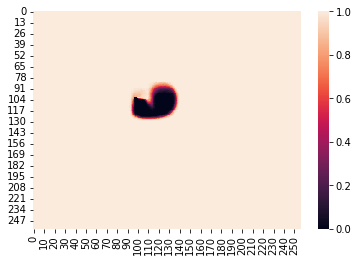

In [ ]:
sns.heatmap(grid.X0[:, :, -1])

<AxesSubplot:>

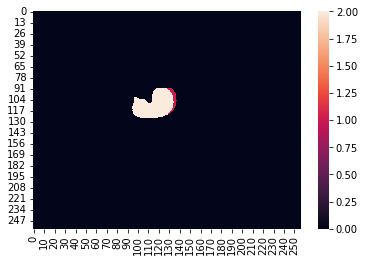

In [ ]:
sns.heatmap(grid.X[:, :, -1])

<AxesSubplot:>

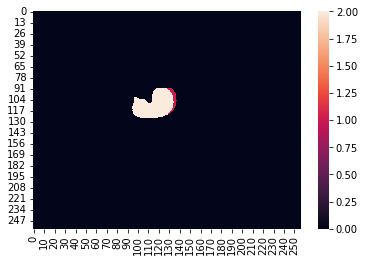

In [ ]:
_, X = torch.max(
    torch.stack((grid.X0, grid.X1, grid.X2), dim=-1),
    dim=-1
)
sns.heatmap(X[:, :, -1])

In [ ]:
X[a, b, -1]

tensor(2)

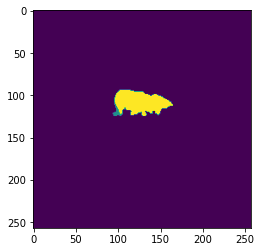

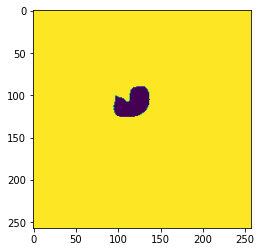

In [ ]:
plt.imshow(y[:, :, -1])
plt.show()
plt.imshow(X[:, :, -1]==0)
plt.show()

Artana
Elapsed time to get the results:      47.90975069999695
Number of iterations (K, n_it):                91 100


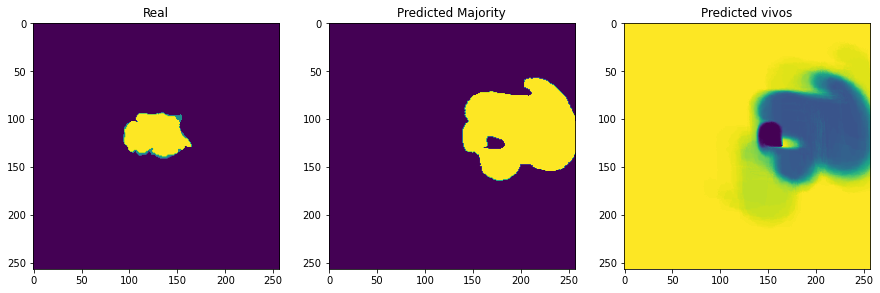

Beneixama
Elapsed time to get the results:      7.037302494049072
Number of iterations (K, n_it):                17 100


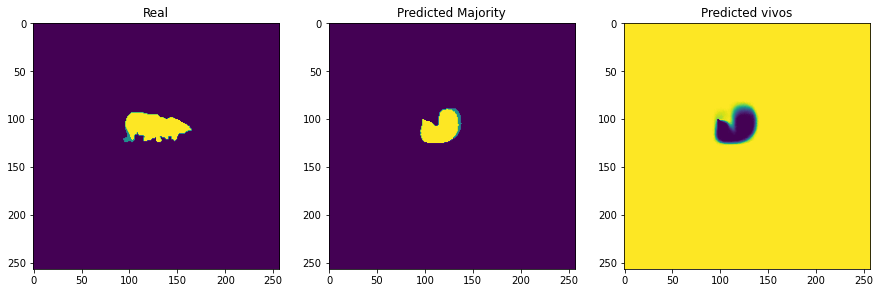

Beniarda
Elapsed time to get the results:      24.83171844482422
Number of iterations (K, n_it):                44 100


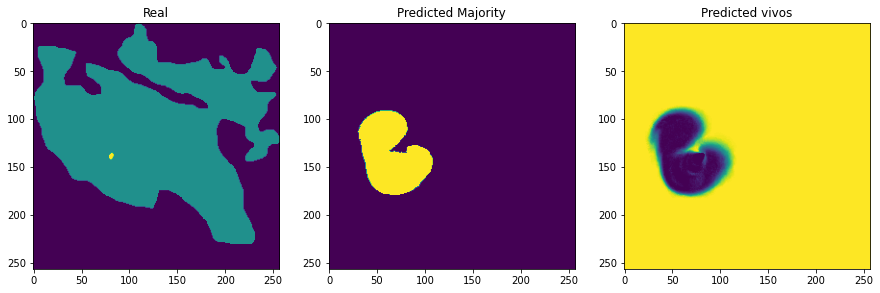

Bolulla
Elapsed time to get the results:      35.628897190093994
Number of iterations (K, n_it):                98 100


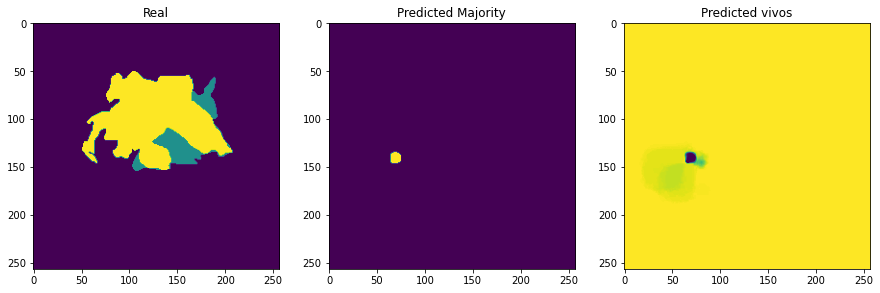

Carcaixent
Elapsed time to get the results:      43.455987215042114
Number of iterations (K, n_it):                81 100


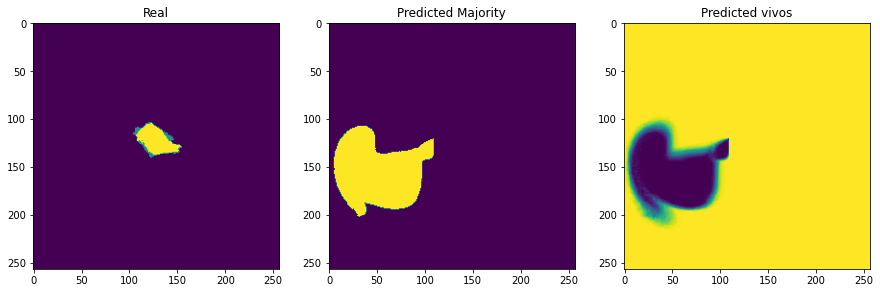

Chella
Elapsed time to get the results:      48.19340634346008
Number of iterations (K, n_it):                75 100


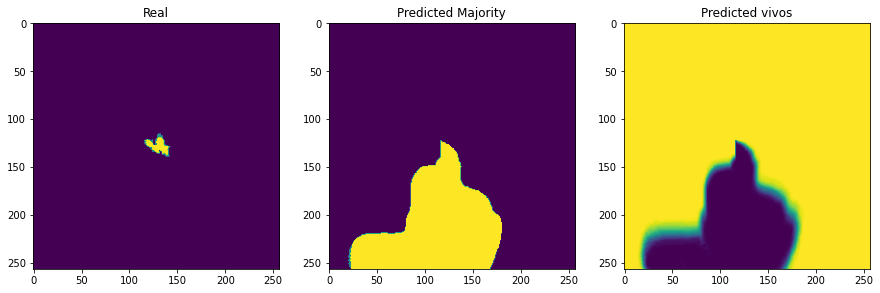

Gatova
Elapsed time to get the results:      56.437567949295044
Number of iterations (K, n_it):                88 100


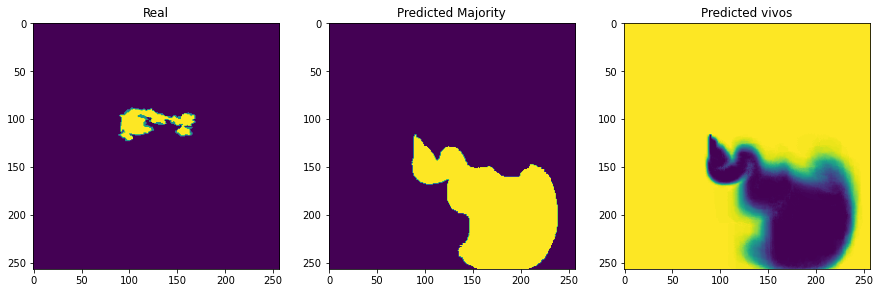

Llutxent
Elapsed time to get the results:      53.37348818778992
Number of iterations (K, n_it):                108 100


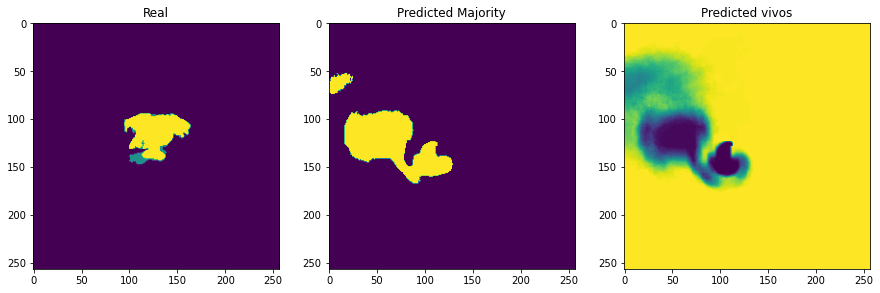

Montan
Elapsed time to get the results:      51.89149737358093
Number of iterations (K, n_it):                131 100


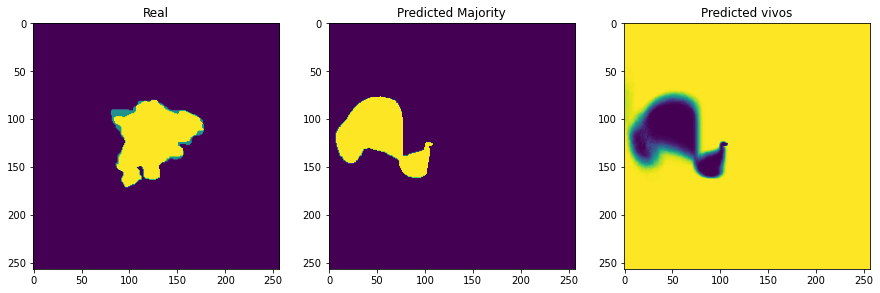

ValldEbo
Elapsed time to get the results:      23.270888090133667
Number of iterations (K, n_it):                43 100


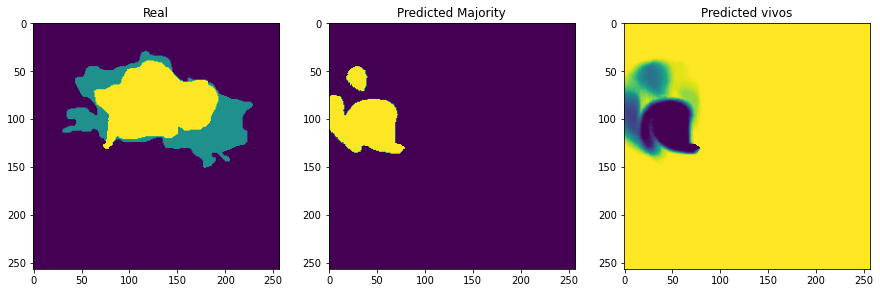

VallGallinera
Elapsed time to get the results:      57.97599792480469
Number of iterations (K, n_it):                104 100


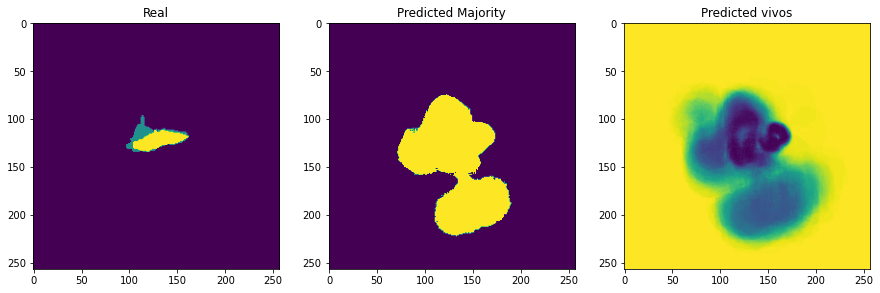

Elapsed time to get ALL the results:      452.17145466804504


In [ ]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.01, 0.2, 0.4])
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    plt.show()
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

Artana
Elapsed time to get the results:      40.629993200302124
Number of iterations (K, n_it):                91 100
Beneixama
Elapsed time to get the results:      8.119107961654663
Number of iterations (K, n_it):                17 100
Beniarda
Elapsed time to get the results:      20.405672788619995
Number of iterations (K, n_it):                44 100
Bolulla
Elapsed time to get the results:      36.84101915359497
Number of iterations (K, n_it):                98 100
Carcaixent
Elapsed time to get the results:      37.07105755805969
Number of iterations (K, n_it):                81 100
Chella
Elapsed time to get the results:      41.595526933670044
Number of iterations (K, n_it):                75 100
Gatova
Elapsed time to get the results:      42.88965964317322
Number of iterations (K, n_it):                88 100
Llutxent
Elapsed time to get the results:      44.922067642211914
Number of iterations (K, n_it):                108 100
Montan
Elapsed time to get the results:      59

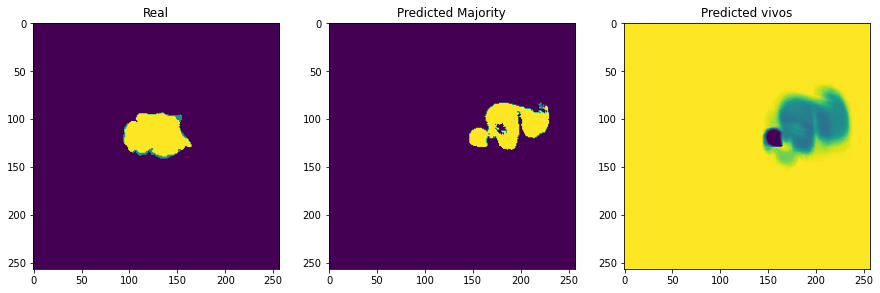

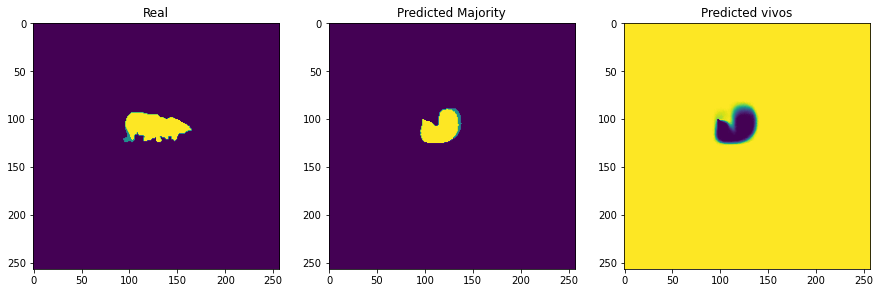

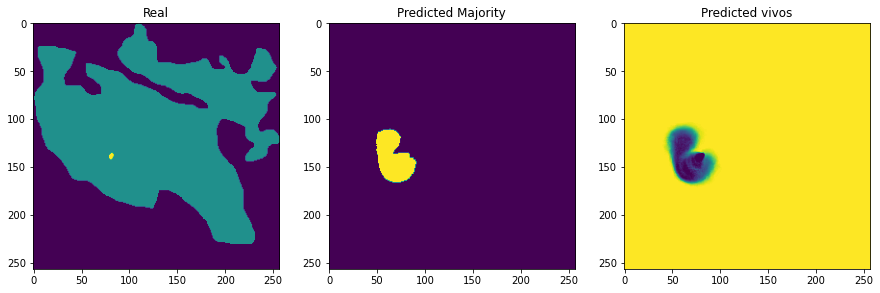

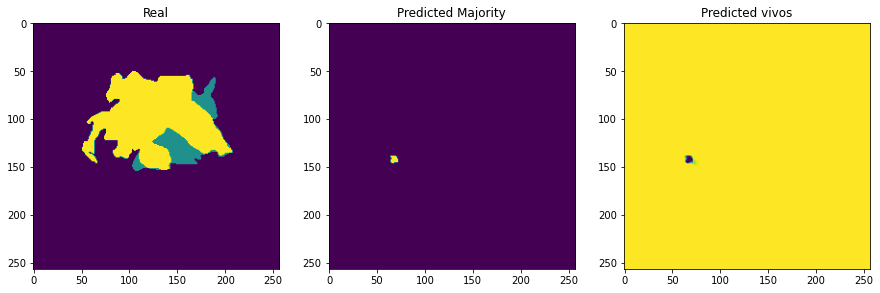

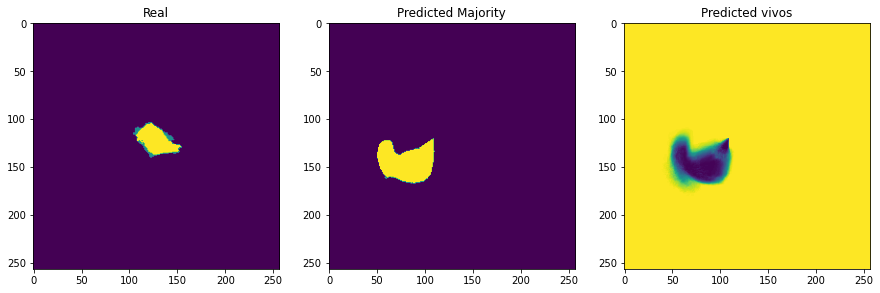

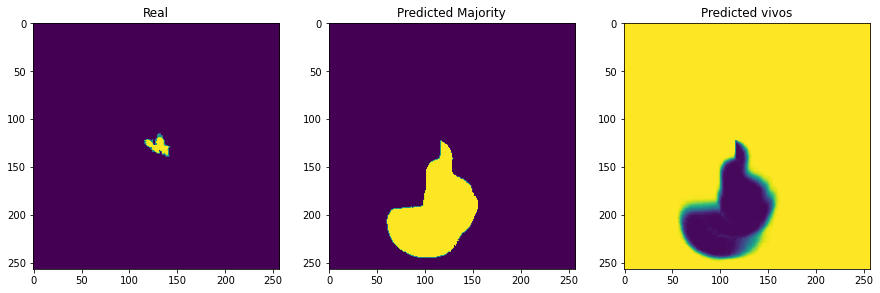

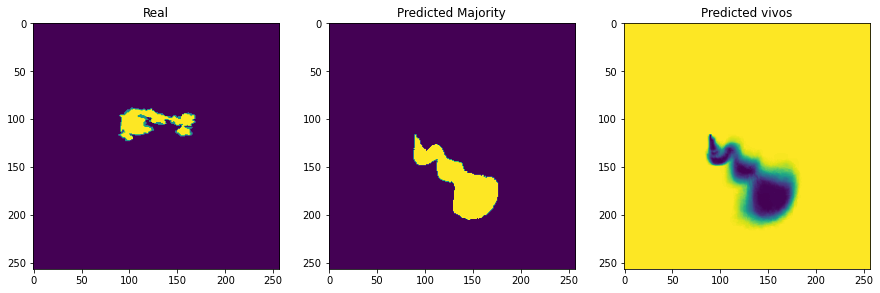

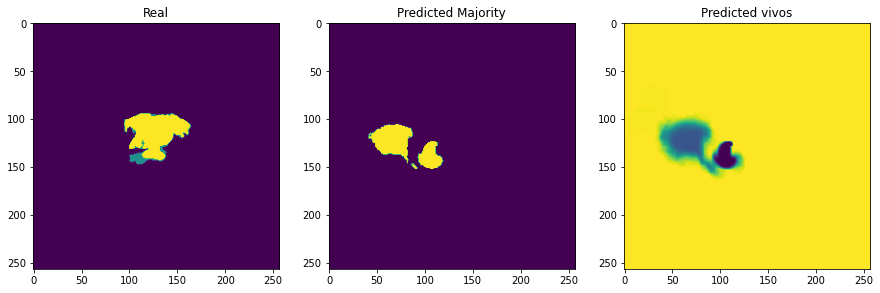

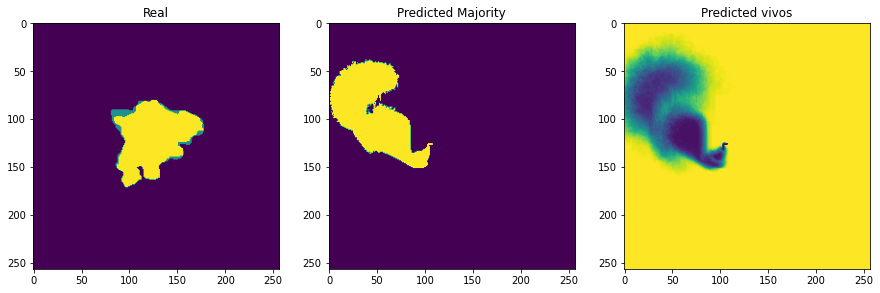

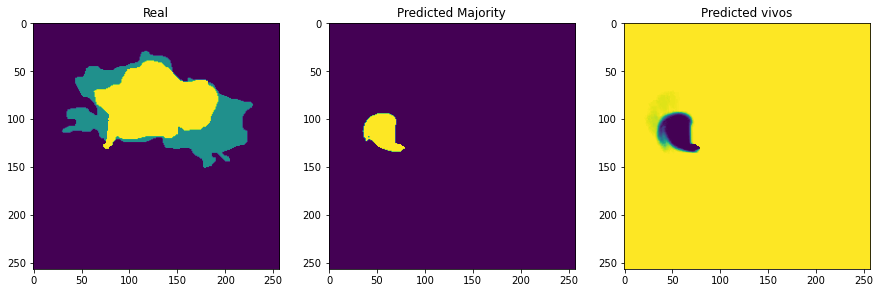

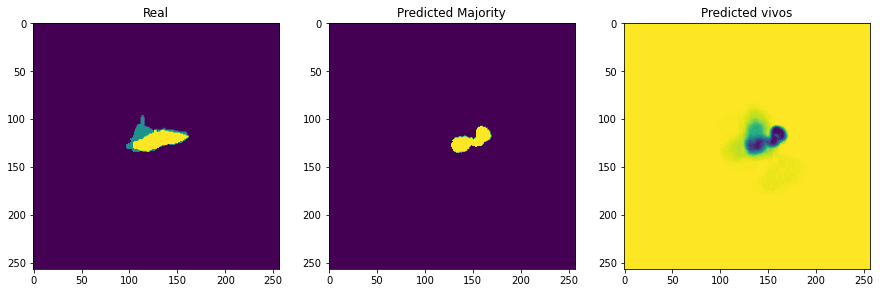

In [ ]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9])
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

data_Alzira


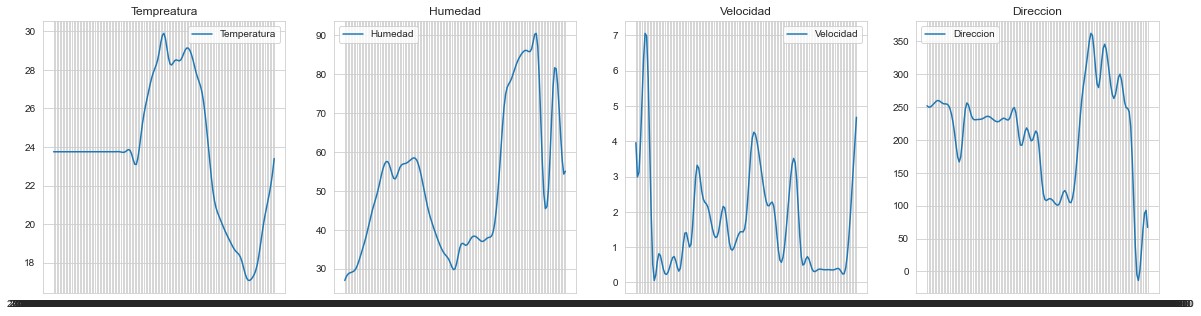

data_Artana


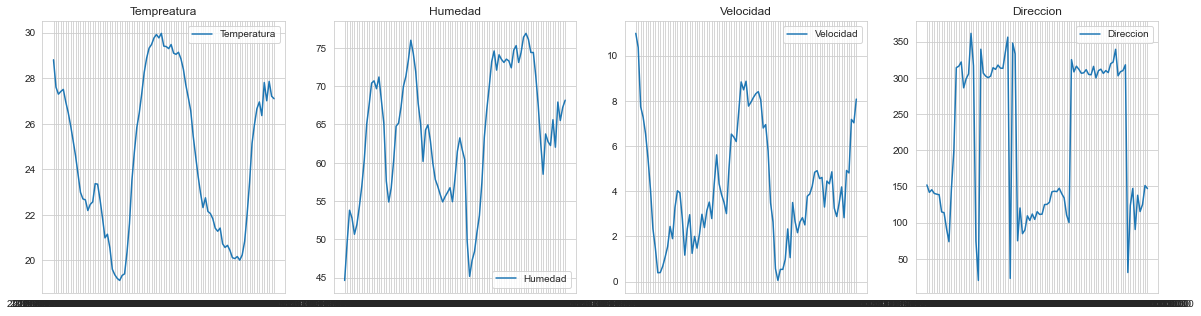

data_Beneixama


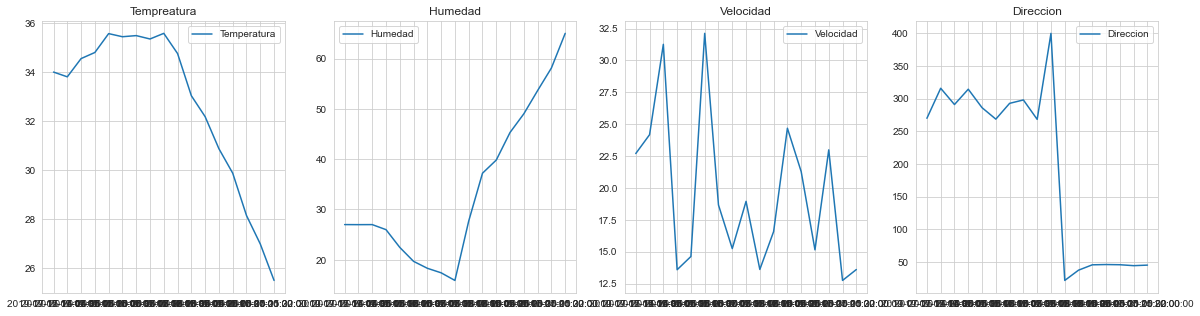

data_Beniarda


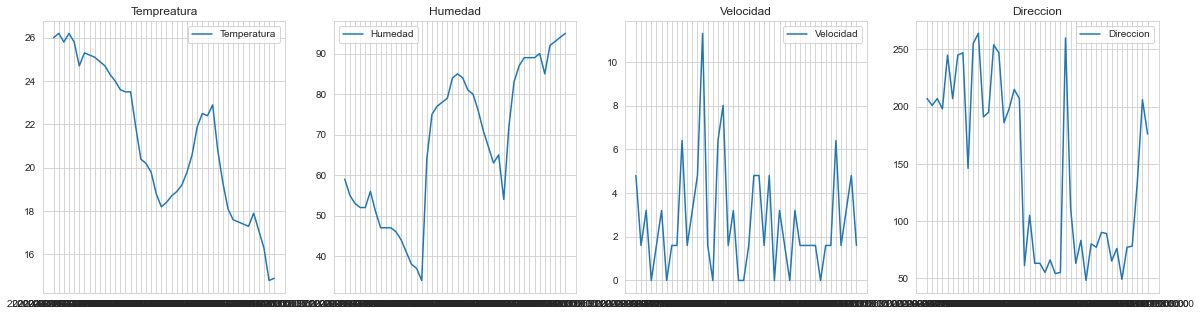

data_Bolulla


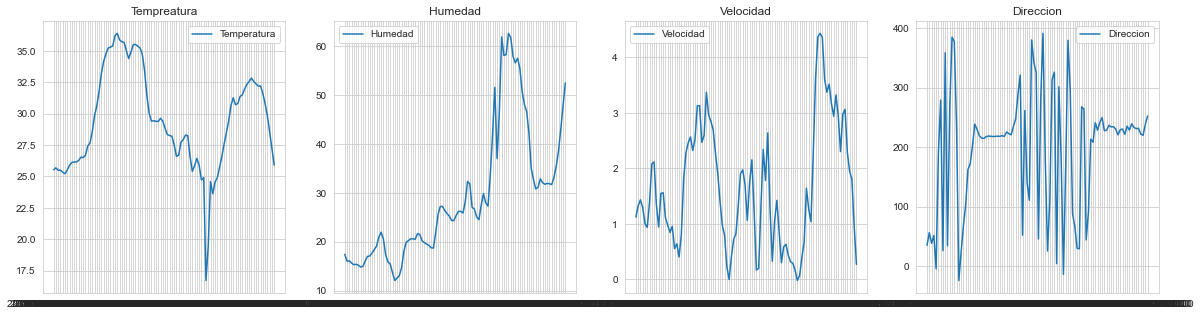

data_Carcaixent


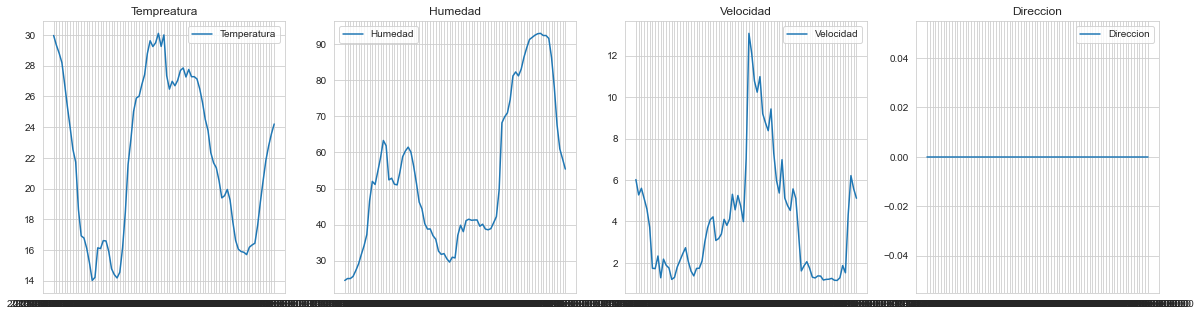

data_Carcaixent_2


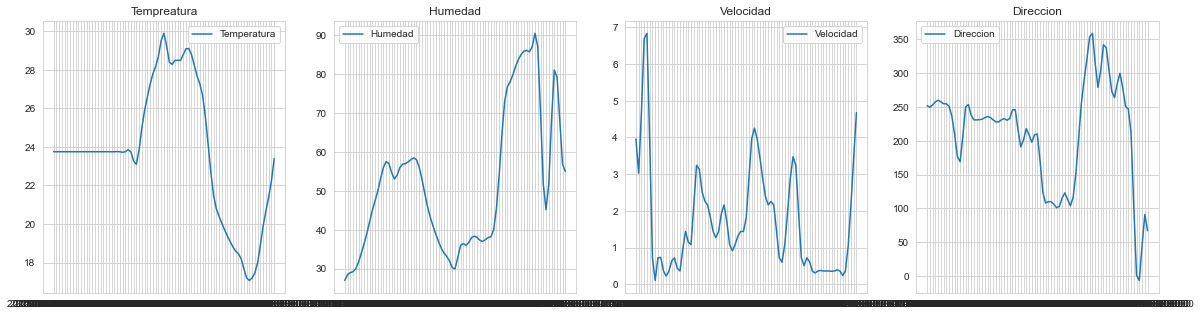

data_Chella


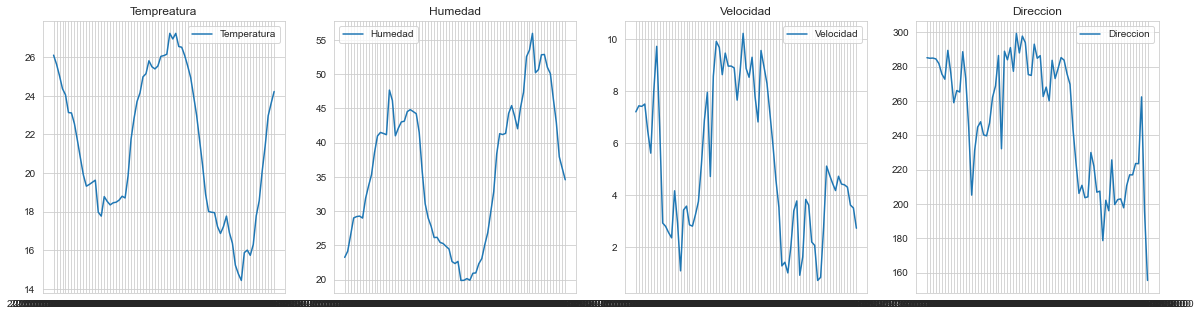

data_Gatova


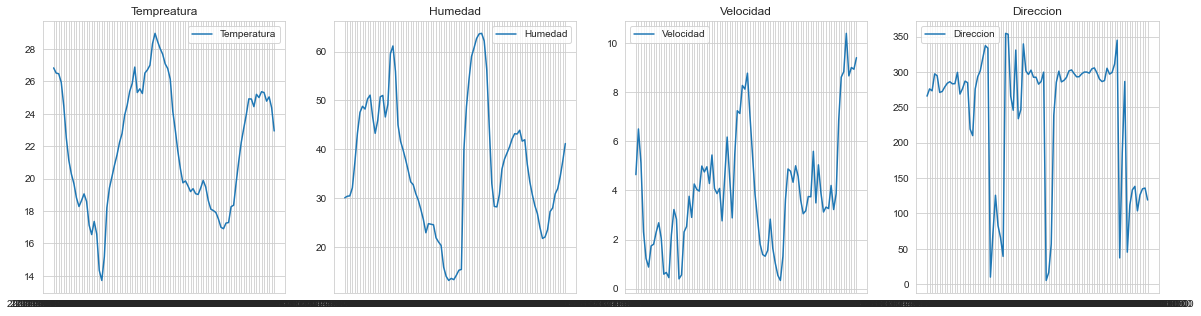

data_Llutxent


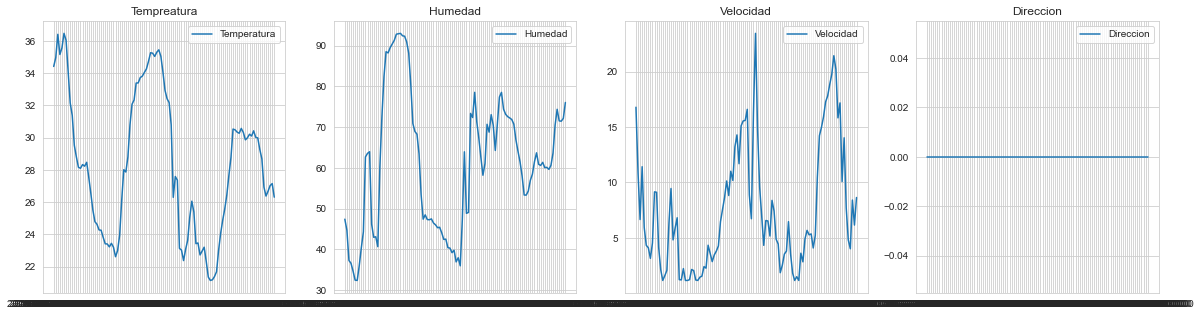

data_Llutxent_2


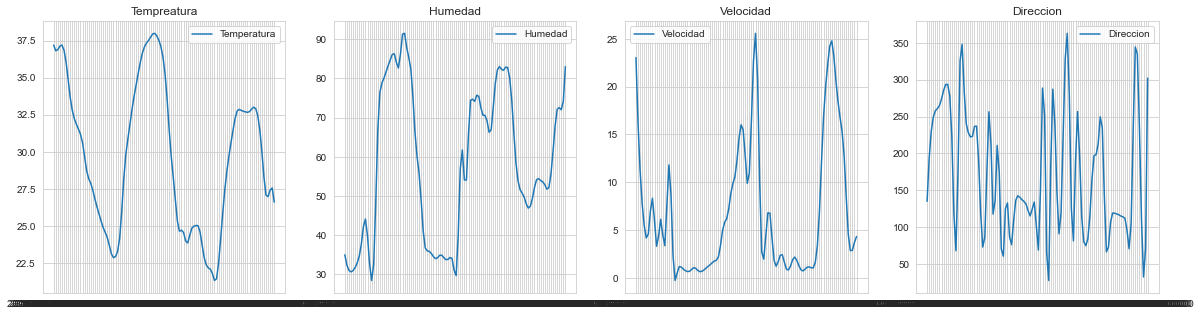

data_Montan


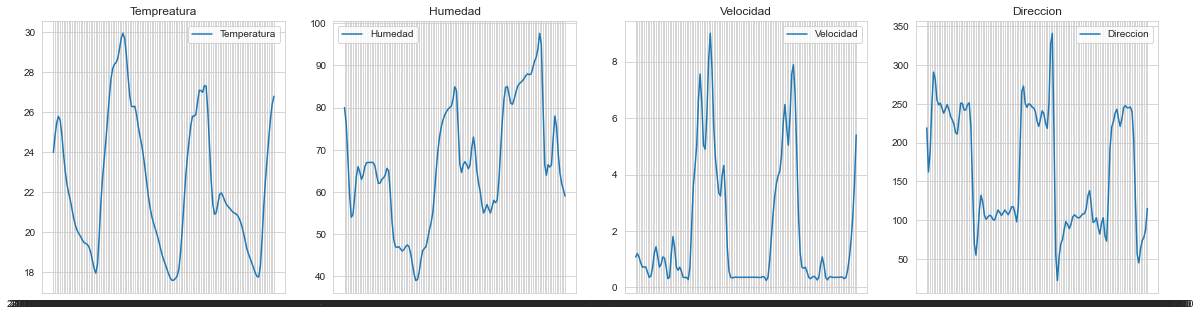

data_ValldEbo


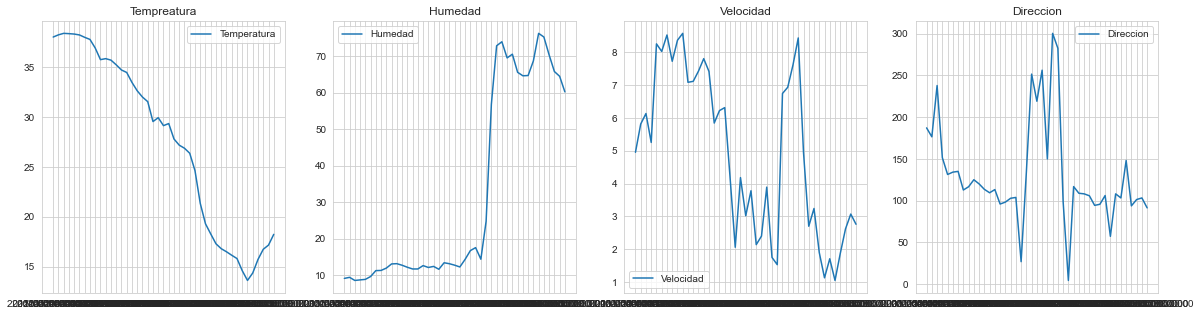

data_VallGallinera


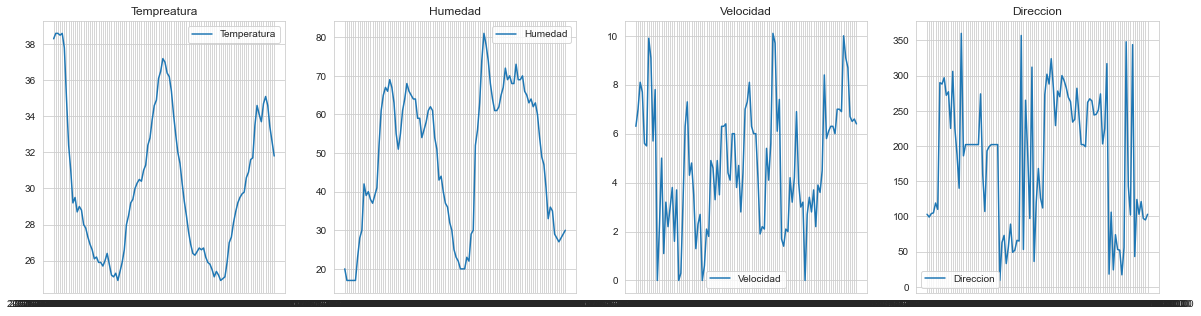

In [ ]:
import os
path = 'C:\\Users\\joanb\\Desktop\\data_incendios\\clima\\process_data\\interpolated_data\\'
for name in os.listdir(path):
    print(name)

    x = pd.read_csv(path + name, index_col=0, sep=';', decimal='.')

    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    #x, y = dict_data_final[name]

    ax[0].plot(x['Temperatura'], label='Temperatura')
    ax[0].set_title('Tempreatura')
    ax[0].legend()

    ax[1].plot(x['Humedad'], label='Humedad')
    ax[1].set_title('Humedad')
    ax[1].legend()

    ax[2].plot(x['Velocidad'], label='Velocidad')
    ax[2].set_title('Velocidad')
    ax[2].legend()

    ax[3].plot(x['Direccion'], label='Direccion')
    ax[3].set_title('Direccion')
    ax[3].legend()

    plt.savefig('fig_' + name + '.png')
    plt.show()


# 2. Probamos el modelo con Temperatura y humedad

In [15]:
alpha = torch.tensor(1., requires_grad=True, dtype=torch.float)
beta = torch.tensor(1., requires_grad=True, dtype=torch.float)
gamma = torch.tensor(1., requires_grad=True, dtype=torch.float)

def fun_p0_c(t, h, alpha, beta, gamma, t_min=0):
    x = gamma * ((h**beta) / ((t - t_min)**alpha))
    p0 = 1 / (1 + x)
    div = 1 + x
    return p0, div

Artana
Elapsed time to get the results:      59.54638981819153
Number of iterations (K, n_it):                91 100
Beneixama
Elapsed time to get the results:      14.484092473983765
Number of iterations (K, n_it):                17 100
Beniarda
Elapsed time to get the results:      28.128241777420044
Number of iterations (K, n_it):                44 100
Bolulla
Elapsed time to get the results:      44.2592294216156
Number of iterations (K, n_it):                98 100
Carcaixent
Elapsed time to get the results:      69.18018817901611
Number of iterations (K, n_it):                81 100
Chella
Elapsed time to get the results:      234.3928325176239
Number of iterations (K, n_it):                75 100
Gatova
Elapsed time to get the results:      177.83469939231873
Number of iterations (K, n_it):                88 100
Llutxent
Elapsed time to get the results:      143.9906985759735
Number of iterations (K, n_it):                108 100
Montan
Elapsed time to get the results:      207.

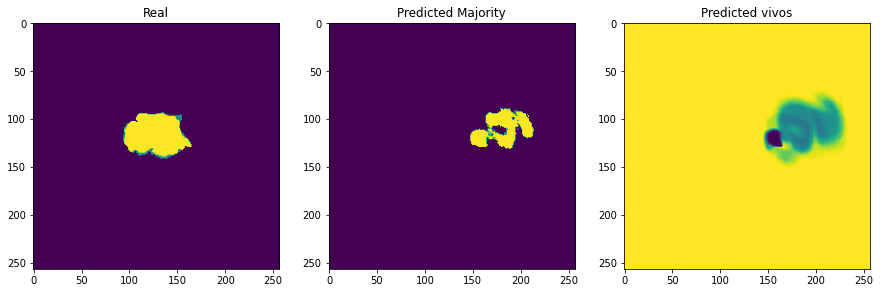

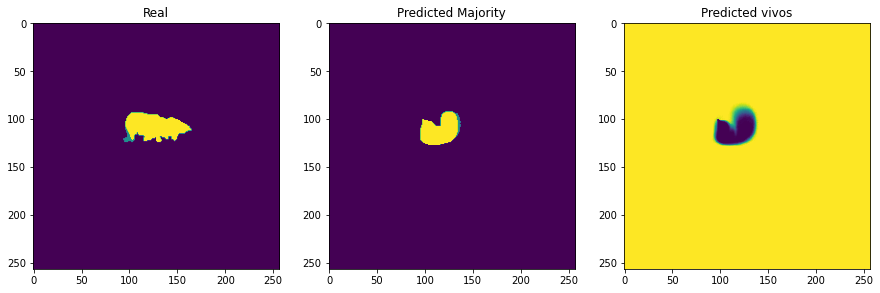

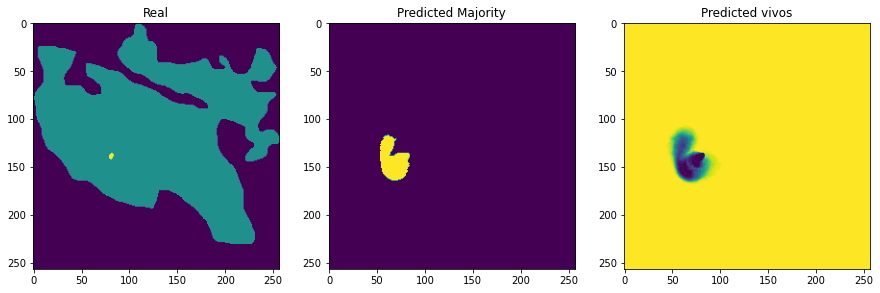

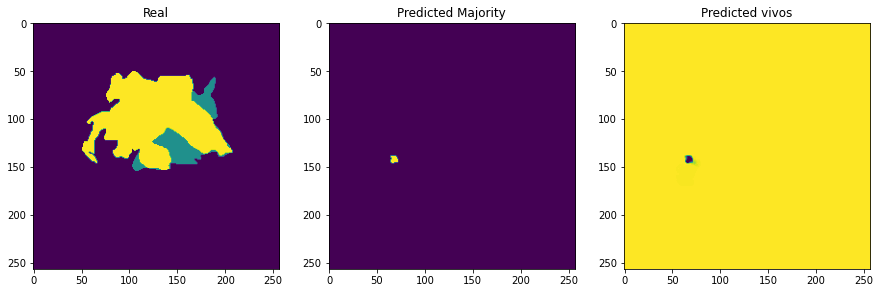

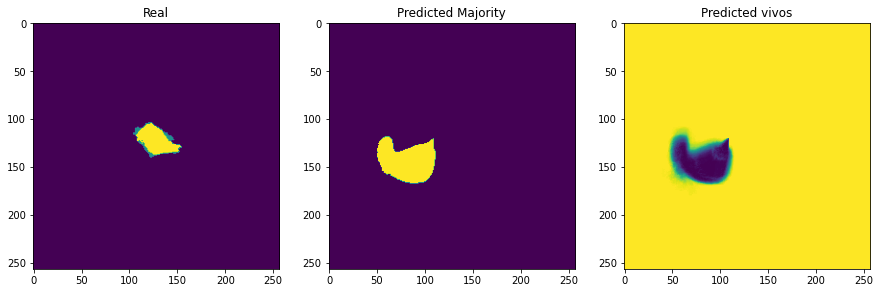

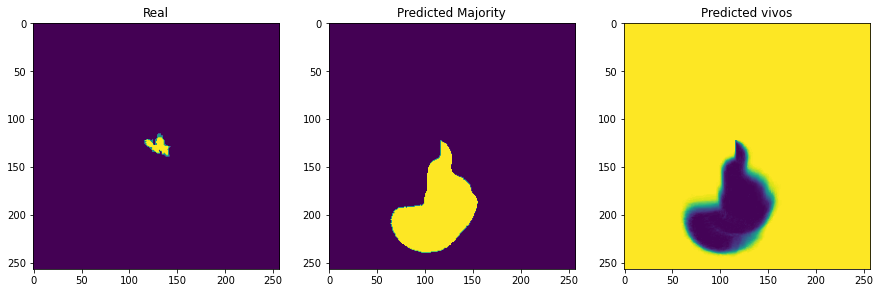

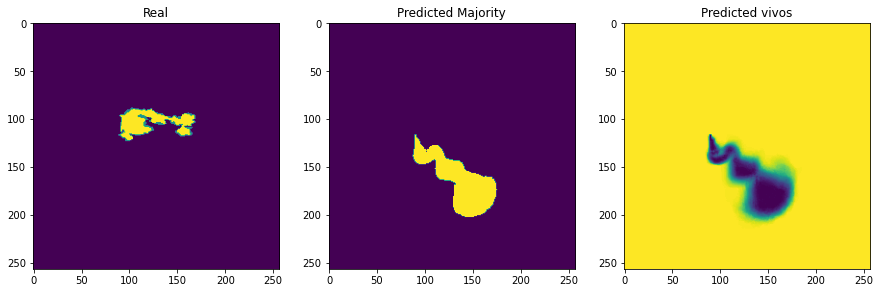

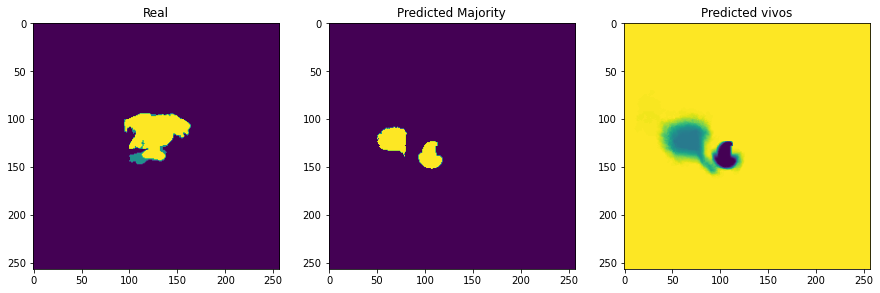

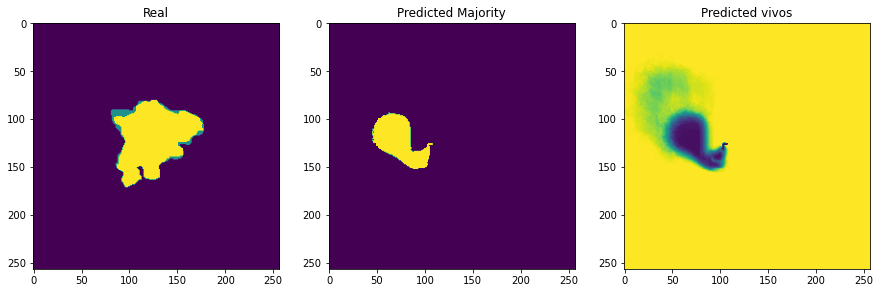

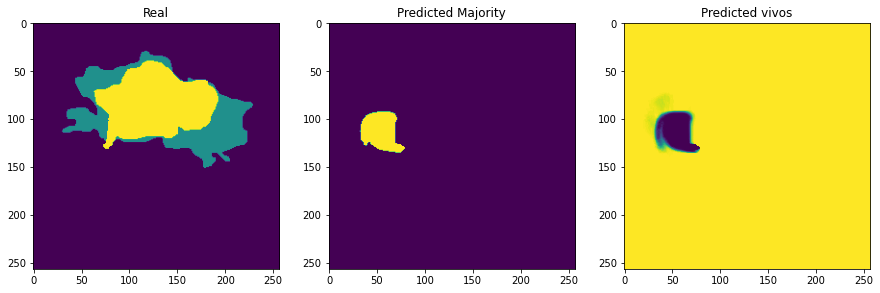

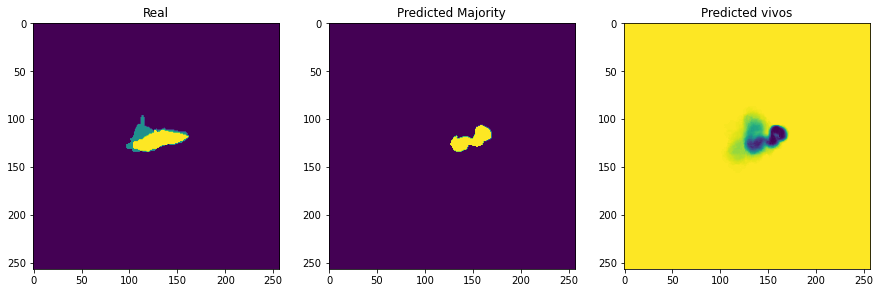

In [ ]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9])
    grid.submatrix()
    grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
    grid.enlargement_process_AI()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    fig
    
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

In [4]:
crit = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam([alpha, beta, gamma], lr=0.01)

epochs = 5
n_it = 10**1
tau = 1

Loss = []
alphas = []
betas = []
gammas = []

for epoch in range(epochs):
    
    print('Epoch: ', epoch)
    
    gradients = []
    loss = 0

    for name in dict_data_final.keys():

        #print(name)
        x, y = dict_data_final[name]
        grid = Grid(x=x, y=y, mode='gumbel')
        grid.initialize(part=[0.1, 0.5, 0.9])
        grid.submatrix()
        grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
        grid.enlargement_process_AI()
        grid.montecarlo(n_it=n_it, tau=tau)
        grid.Train = torch.cat((torch.tensor([False]), grid.Train.type(torch.bool)), 0)
        
        try:
            l = crit(grid.X0[:, :, grid.Train.type(torch.bool)], grid.y)
            loss += l
            l.backward()
            #print('Incendio:    ', name, '  Loss: ', l.item())
            #print('Gradient: ', alpha.grad.item(), beta.grad.item(), gamma.grad.item())
            gradients.append((alpha.grad.clone(), beta.grad.clone(), gamma.grad.clone()))
            #print('Processed: ', name)
        except:
            pass
            #print('Error con el entrenamiento de: ', name)
        
        alpha.grad.zero_()
        beta.grad.zero_()
        gamma.grad.zero_()

    
    avg_grad_alpha = torch.mean(torch.stack([grad[0] for grad in gradients]), dim=0)
    avg_grad_beta = torch.mean(torch.stack([grad[1] for grad in gradients]), dim=0)
    avg_grad_gamma = torch.mean(torch.stack([grad[2] for grad in gradients]), dim=0)

    print('Los gradientes (alpha, beta, gamma): ', avg_grad_alpha.item(), avg_grad_beta.item(), avg_grad_gamma.item())

    alpha.data -= 0.001 * avg_grad_alpha
    beta.data -= 0.001 * avg_grad_beta
    gamma.data -= 0.001 * avg_grad_gamma

    #print('Los parámetros (alpha, beta, gamma): ', alpha.data.item(), beta.data.item(), gamma.data.item())
    
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Epoch: ', epoch, 'Loss Total: ', loss.item())

    Loss.append(loss.item())
    alphas.append(alpha.item())
    betas.append(beta.item())
    gammas.append(gamma.item())

    gradients = [] # Limpiando la lista de gradientes acumulados

    optimizer.zero_grad() # Limpiando los gradientes acumulados

Epoch:  0


c:\Users\joanb\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([257, 257, 10])) that is different to the input size (torch.Size([257, 257, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Los gradientes (alpha, beta, gamma):  112.26216125488281 -137.3748779296875 -36.19266128540039
Los parámetros (alpha, beta, gamma):  0.8877378106117249 1.1373748779296875 1.0361926555633545
Epoch:  0 Loss Total:  5635604.5
Epoch:  1


c:\Users\joanb\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([257, 257, 10])) that is different to the input size (torch.Size([257, 257, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Los gradientes (alpha, beta, gamma):  65.01829528808594 -73.3021469116211 -20.18313217163086
Los parámetros (alpha, beta, gamma):  0.8227195143699646 1.2106770277023315 1.0563757419586182
Epoch:  1 Loss Total:  5660627.0
Epoch:  2


c:\Users\joanb\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([257, 257, 10])) that is different to the input size (torch.Size([257, 257, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Los gradientes (alpha, beta, gamma):  42.766143798828125 -45.561767578125 -13.305363655090332
Los parámetros (alpha, beta, gamma):  0.7799533605575562 1.2562388181686401 1.0696810483932495
Epoch:  2 Loss Total:  5672001.5
Epoch:  3


c:\Users\joanb\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([257, 257, 10])) that is different to the input size (torch.Size([257, 257, 9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [1]:
plt.plot(Loss)
plt.show()

plt.plot(alphas)
plt.plot(betas)
plt.plot(gammas)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
print(alpha, beta, gamma)

tensor(-0.8905, requires_grad=True) tensor(2.8558, requires_grad=True) tensor(2.9174, requires_grad=True)


In [ ]:
crit = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam([alpha, beta, gamma], lr=0.01)

epochs = 5
n_it = 10**1
tau = 1

Loss = []
alphas = []
betas = []
gammas = []

for epoch in range(epochs):
    
    print('Epoch: ', epoch)
    
    gradients = []
    loss = 0

    for name in dict_data_final.keys():

        #print(name)
        x, y = dict_data_final[name]
        grid = Grid(x=x, y=y, mode='gumbel')
        grid.initialize(part=[0.1, 0.5, 0.9])
        grid.submatrix()
        grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
        grid.enlargement_process_AI()
        grid.montecarlo(n_it=n_it, tau=tau)
        grid.Train = torch.cat((torch.tensor([False]), grid.Train.type(torch.bool)), 0)
        
        try:
            l = crit(grid.X0[grid.y == 0][grid.Train.type(torch.bool)], grid.y[grid.y == 0][:])
            loss += l
            l.backward()
            #print('Incendio:    ', name, '  Loss: ', l.item())
            #print('Gradient: ', alpha.grad.item(), beta.grad.item(), gamma.grad.item())
            gradients.append((alpha.grad.clone(), beta.grad.clone(), gamma.grad.clone()))
            #print('Processed: ', name)
        except:
            pass
            #print('Error con el entrenamiento de: ', name)
        
        alpha.grad.zero_()
        beta.grad.zero_()
        gamma.grad.zero_()

    
    avg_grad_alpha = torch.mean(torch.stack([grad[0] for grad in gradients]), dim=0)
    avg_grad_beta = torch.mean(torch.stack([grad[1] for grad in gradients]), dim=0)
    avg_grad_gamma = torch.mean(torch.stack([grad[2] for grad in gradients]), dim=0)

    print('Los gradientes (alpha, beta, gamma): ', avg_grad_alpha.item(), avg_grad_beta.item(), avg_grad_gamma.item())

    alpha.data -= 0.001 * avg_grad_alpha
    beta.data -= 0.001 * avg_grad_beta
    gamma.data -= 0.001 * avg_grad_gamma

    #print('Los parámetros (alpha, beta, gamma): ', alpha.data.item(), beta.data.item(), gamma.data.item())
    
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Epoch: ', epoch, 'Loss Total: ', loss.item())

    Loss.append(loss.item())
    alphas.append(alpha.item())
    betas.append(beta.item())
    gammas.append(gamma.item())

    gradients = [] # Limpiando la lista de gradientes acumulados

    optimizer.zero_grad() # Limpiando los gradientes acumulados

Artana
Los parámetros (alpha, beta, gamma):  -0.8905484080314636 2.855767250061035 2.9174087047576904
Los valores que toma p0:  9.678745271912703e-08 3.3439377489230537e-07 1.5006668263595202e-07 5.170680950072892e-08
Los valores que toma div:  2990486.25 10331918.0 7295081.5 1957953.5
Elapsed time to get the results:      4.187715768814087
Number of iterations (K, n_it):                91 100
Beneixama
Los parámetros (alpha, beta, gamma):  -0.8905484080314636 2.855767250061035 2.9174087047576904
Los valores que toma p0:  1.2739486976443004e-07 5.279298420646228e-06 1.5156058452703292e-06 1.545441023154126e-06
Los valores que toma div:  189419.109375 7849609.5 2133241.0 2315525.0
Elapsed time to get the results:      0.8193061351776123
Number of iterations (K, n_it):                17 100
Beniarda
Los parámetros (alpha, beta, gamma):  -0.8905484080314636 2.855767250061035 2.9174087047576904
Los valores que toma p0:  6.742780556123762e-08 8.71871861818363e-07 1.9827508879188827e-07 1.80

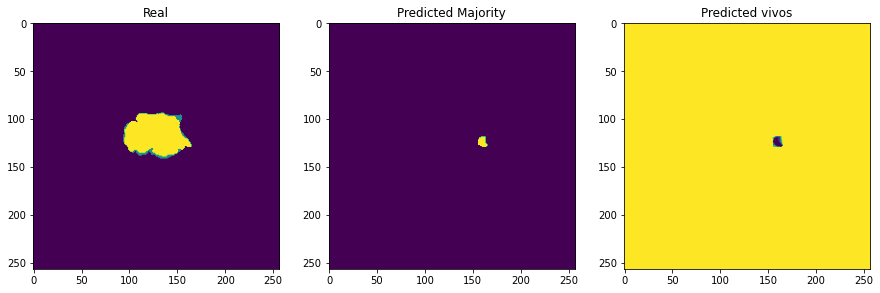

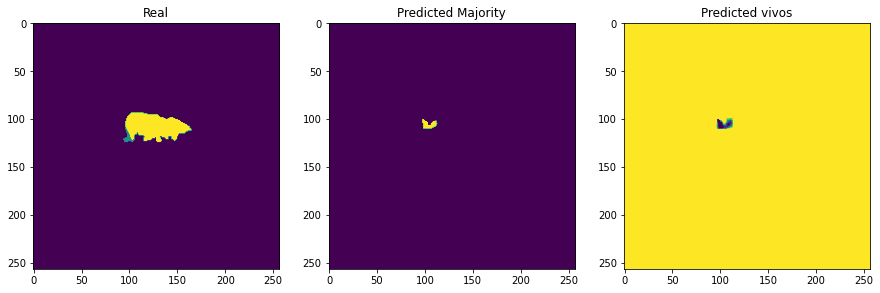

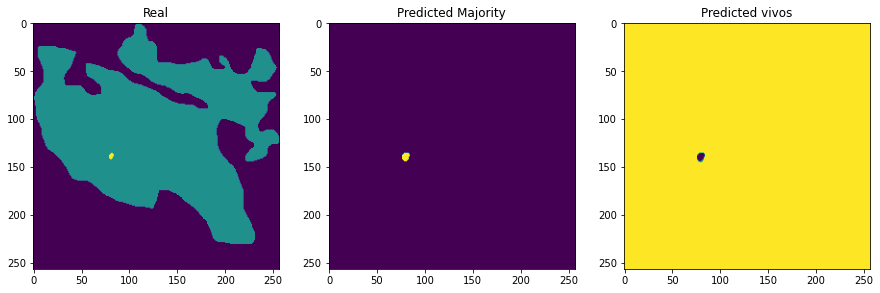

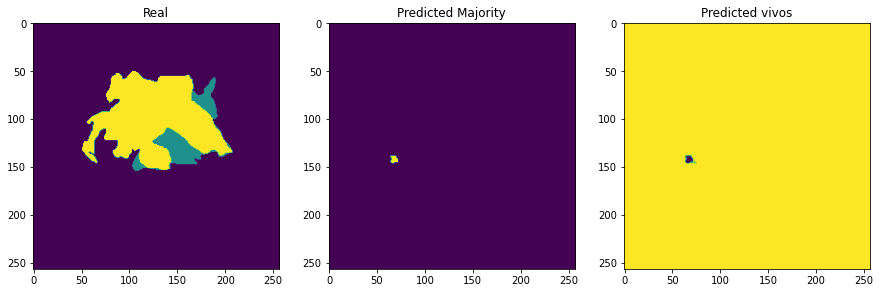

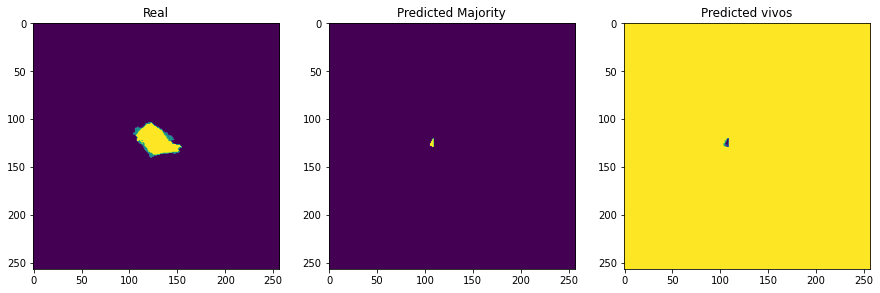

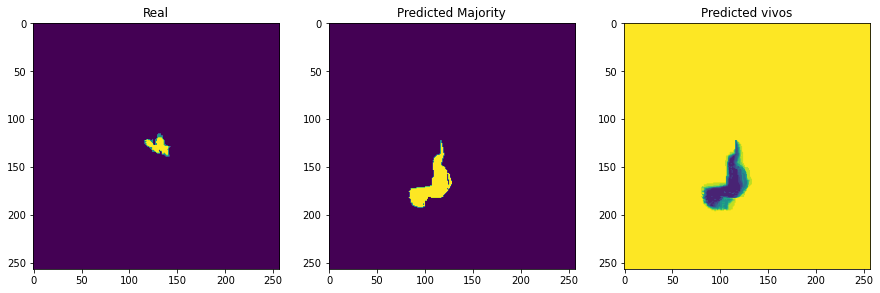

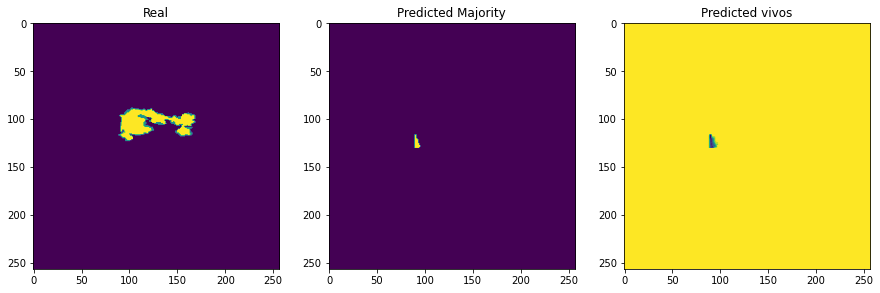

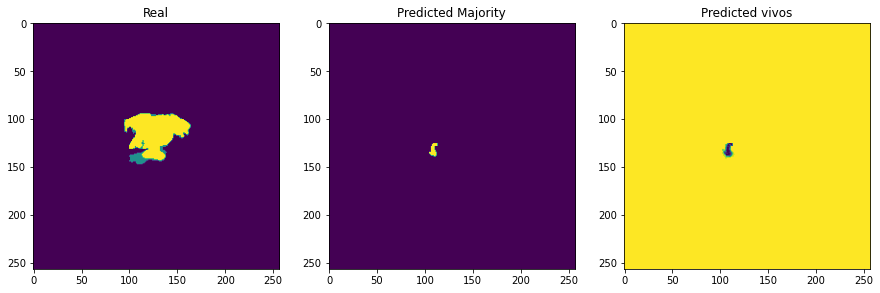

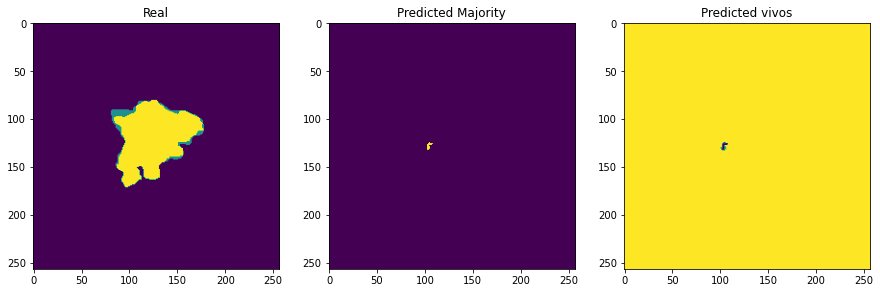

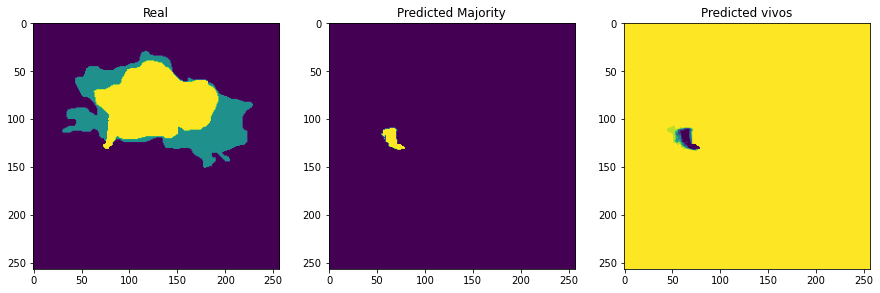

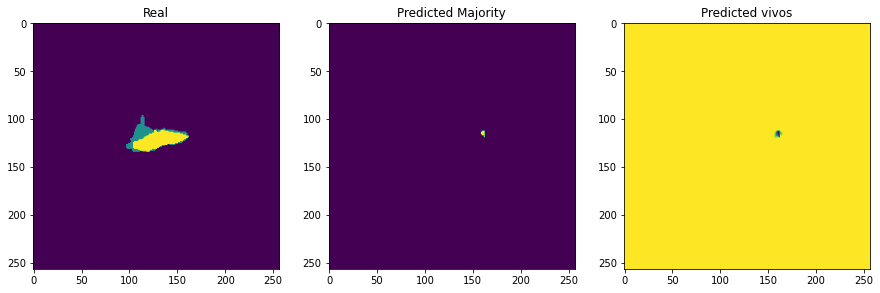

In [ ]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9])
    grid.submatrix()
    grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Los valores que toma p0: ', grid.p0.min().item(), grid.p0.max().item(), grid.p0.mean().item(), grid.p0.std().item())
    print('Los valores que toma div: ', grid.div.min().item(), grid.div.max().item(), grid.div.mean().item(), grid.div.std().item())
    grid.enlargement_process_AI()
    grid.montecarlo(n_it=n_it)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    fig
    
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

# 3. Probamos Cross Entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from spread_train import *
import pickle
import time

with open('dict_data_final.pkl', 'rb') as f:
    dict_data_final = pickle.load(f)

In [2]:
def get_probs(cl0, cl1, cl2):

    cl0 = cl0.flatten()
    cl1 = cl1.flatten()
    cl2 = cl2.flatten()

    probs = torch.stack([cl0, cl1, cl2], dim=1).reshape(-1, 3)

    return probs

alpha = torch.tensor(1., requires_grad=True, dtype=torch.float)
beta = torch.tensor(1., requires_grad=True, dtype=torch.float)
gamma = torch.tensor(1., requires_grad=True, dtype=torch.float)

def fun_p0_c(t, h, alpha, beta, gamma, t_min=0):
    x = gamma * ((h**beta) / ((t - t_min)**alpha))
    p0 = 1 / (1 + x)
    div = 1 + x
    return p0, div

In [3]:
crit = torch.nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam([alpha, beta, gamma], lr=0.001)

lr = 0.01
epochs = 3
n_it = 10**1
tau = 1

Loss = []
alphas = []
betas = []
gammas = []

for epoch in range(epochs):
    
    print('Epoch: ', epoch)
    
    gradients = []
    loss = 0

    for name in dict_data_final.keys():

        #print(name)
        x, y = dict_data_final[name]
        grid = Grid(x=x, y=y, mode='gumbel')
        grid.initialize(part=[0.1, 0.5, 0.9])
        grid.submatrix()
        grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
        grid.enlargement_process_AI()
        grid.montecarlo(n_it=n_it, tau=tau)
        grid.Train = torch.cat((torch.tensor([False]), grid.Train.type(torch.bool)), 0)
        
      
        try:
            probs = get_probs(grid.X0[:, :, grid.Train], grid.X1[:, :, grid.Train], grid.X2[:, :, grid.Train])
            l = crit(probs, grid.y.flatten().long())
            loss += l
            l.backward()
            print('Incendio:    ', name, '  Loss: ', l.item())
            print('Gradient: ', alpha.grad.item(), beta.grad.item(), gamma.grad.item())
            gradients.append((alpha.grad.clone(), beta.grad.clone(), gamma.grad.clone()))
            print('Processed: ', name)
        except:
            pass

        alpha.grad.zero_()
        beta.grad.zero_()
        gamma.grad.zero_()

    
    avg_grad_alpha = torch.mean(torch.stack([grad[0] for grad in gradients]), dim=0)
    avg_grad_beta = torch.mean(torch.stack([grad[1] for grad in gradients]), dim=0)
    avg_grad_gamma = torch.mean(torch.stack([grad[2] for grad in gradients]), dim=0)

    print('Los gradientes (alpha, beta, gamma): ', avg_grad_alpha.item(), avg_grad_beta.item(), avg_grad_gamma.item())

    alpha.data -= lr * avg_grad_alpha
    beta.data -= lr * avg_grad_beta
    gamma.data -= lr * avg_grad_gamma

    #print('Los parámetros (alpha, beta, gamma): ', alpha.data.item(), beta.data.item(), gamma.data.item())
    
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Epoch: ', epoch, 'Loss Total: ', loss.item())

    Loss.append(loss.item())
    alphas.append(alpha.item())
    betas.append(beta.item())
    gammas.append(gamma.item())

    gradients = [] # Limpiando la lista de gradientes acumulados

    optimizer.zero_grad() # Limpiando los gradientes acumulados

Epoch:  0
Incendio:     Artana   Loss:  342548.53125
Gradient:  138.61337280273438 -189.17263793945312 -44.208213806152344
Processed:  Artana
Incendio:     Beneixama   Loss:  335141.1875
Gradient:  36.52623748779297 -11.54875373840332 -9.805562973022461
Processed:  Beneixama
Incendio:     Beniarda   Loss:  104132.8046875
Gradient:  187.1243438720703 -240.55450439453125 -60.0833740234375
Processed:  Beniarda
Incendio:     Carcaixent   Loss:  374427.0625
Gradient:  549.7463989257812 -639.6581420898438 -170.96018981933594
Processed:  Carcaixent
Incendio:     Chella   Loss:  265354.1875
Gradient:  2219.369873046875 -2439.775146484375 -713.4196166992188
Processed:  Chella
Incendio:     Gatova   Loss:  455806.65625
Gradient:  1657.2158203125 -1916.81787109375 -547.5137939453125
Processed:  Gatova
Incendio:     Llutxent   Loss:  674359.0
Gradient:  1249.36181640625 -1248.054443359375 -351.9797668457031
Processed:  Llutxent
Incendio:     Montan   Loss:  441781.71875
Gradient:  2782.10522460937

KeyboardInterrupt: 

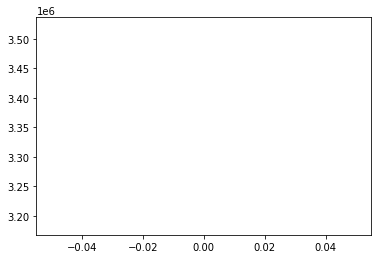

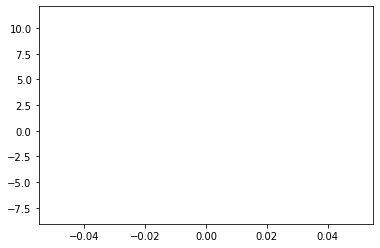

In [5]:
plt.plot(Loss)
plt.show()

plt.plot(alphas)
plt.plot(betas)
plt.plot(gammas)
plt.show()

In [9]:
alpha = torch.tensor(3., requires_grad=True, dtype=torch.float)
beta = torch.tensor(3., requires_grad=True, dtype=torch.float)
gamma = torch.tensor(3., requires_grad=True, dtype=torch.float)

crit = torch.nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam([alpha, beta, gamma], lr=0.001)

lr = 0.001
epochs = 7
n_it = 10**1
tau = 1

Loss = []
alphas = []
betas = []
gammas = []

for epoch in range(epochs):
    
    print('Epoch: ', epoch)
    
    gradients = []
    loss = 0

    for name in dict_data_final.keys():

        #print(name)
        x, y = dict_data_final[name]
        grid = Grid(x=x, y=y, mode='gumbel')
        grid.initialize(part=[0.2, 0.21, 0.3])
        grid.submatrix()
        grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
        grid.enlargement_process_AI()
        grid.montecarlo(n_it=n_it, tau=tau)
        grid.Train = torch.cat((torch.tensor([False]), grid.Train.type(torch.bool)), 0)
        
      
        try:
            probs = get_probs(grid.X0[:, :, grid.Train], grid.X1[:, :, grid.Train], grid.X2[:, :, grid.Train])
            l = crit(probs, grid.y.flatten().long())
            loss += l
            l.backward()
            print('Incendio:    ', name, '  Loss: ', l.item())
            print('Gradient: ', alpha.grad.item(), beta.grad.item(), gamma.grad.item())
            gradients.append((alpha.grad.clone(), beta.grad.clone(), gamma.grad.clone()))
            print('Processed: ', name)
        except:
            pass

        alpha.grad.zero_()
        beta.grad.zero_()
        gamma.grad.zero_()

    
    avg_grad_alpha = torch.mean(torch.stack([grad[0] for grad in gradients]), dim=0)
    avg_grad_beta = torch.mean(torch.stack([grad[1] for grad in gradients]), dim=0)
    avg_grad_gamma = torch.mean(torch.stack([grad[2] for grad in gradients]), dim=0)

    print('Los gradientes (alpha, beta, gamma): ', avg_grad_alpha.item(), avg_grad_beta.item(), avg_grad_gamma.item())

    alpha.data -= lr * avg_grad_alpha
    beta.data -= lr * avg_grad_beta
    gamma.data -= lr * avg_grad_gamma

    #print('Los parámetros (alpha, beta, gamma): ', alpha.data.item(), beta.data.item(), gamma.data.item())
    
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Epoch: ', epoch, 'Loss Total: ', loss.item())

    Loss.append(loss.item())
    alphas.append(alpha.item())
    betas.append(beta.item())
    gammas.append(gamma.item())

    gradients = [] # Limpiando la lista de gradientes acumulados

    optimizer.zero_grad() # Limpiando los gradientes acumulados

Epoch:  0
Incendio:     Artana   Loss:  341123.84375
Gradient:  -57.810951232910156 68.85792541503906 5.823500633239746
Processed:  Artana
Incendio:     Beneixama   Loss:  335216.5
Gradient:  0.9960174560546875 12.205896377563477 0.03547549247741699
Processed:  Beneixama
Incendio:     Beniarda   Loss:  104229.6484375
Gradient:  8.503400802612305 -10.308430671691895 -0.8781753182411194
Processed:  Beniarda
Incendio:     Carcaixent   Loss:  368101.375
Gradient:  3.90157413482666 -2.4944167137145996 -0.41055214405059814
Processed:  Carcaixent
Incendio:     Chella   Loss:  261484.359375
Gradient:  1894.1395263671875 -1847.31982421875 -195.15701293945312
Processed:  Chella
Incendio:     Gatova   Loss:  444789.6875
Gradient:  9.578113555908203 -6.351433753967285 -0.8333799242973328
Processed:  Gatova
Incendio:     Llutxent   Loss:  672900.375
Gradient:  1270.503662109375 -1246.124267578125 -118.67647552490234
Processed:  Llutxent
Incendio:     Montan   Loss:  430356.46875
Gradient:  6.688943

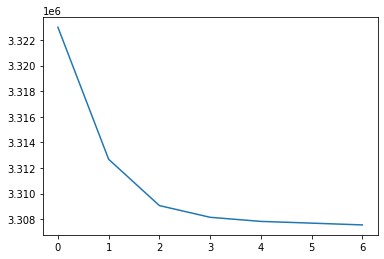

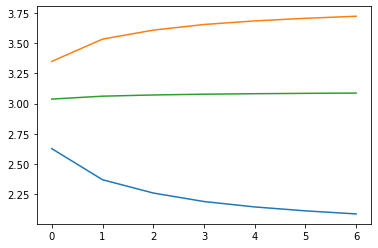

In [10]:
plt.plot(Loss)
plt.show()

plt.plot(alphas)
plt.plot(betas)
plt.plot(gammas)
plt.show()

In [11]:
print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())

Los parámetros (alpha, beta, gamma):  2.0854110717773438 3.7231485843658447 3.086590051651001


In [14]:
grid.p0.min().item(), grid.p0.max().item(), grid.div.min().item(), grid.div.max().item()

(2.7452535505290143e-05,
 0.019549302756786346,
 51.15271759033203,
 36426.5078125)

## 2.1 Probamos usando $\Delta_{ID}=2$

In [25]:
alpha = torch.tensor(3., requires_grad=True, dtype=torch.float)
beta = torch.tensor(3., requires_grad=True, dtype=torch.float)
gamma = torch.tensor(3., requires_grad=True, dtype=torch.float)

crit = torch.nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam([alpha, beta, gamma], lr=0.001)

lr = 0.001
epochs = 7
n_it = 10**1
tau = 1

Loss = []
alphas = []
betas = []
gammas = []

for epoch in range(epochs):
    
    print('Epoch: ', epoch)
    
    gradients = []
    loss = 0

    for name in dict_data_final.keys():

        #print(name)
        x, y = dict_data_final[name]
        grid = Grid(x=x, y=y, mode='gumbel')
        grid.initialize(part=[0.2, 0.21, 0.3], inc=2)
        grid.submatrix()
        grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
        grid.enlargement_process_AI()
        grid.montecarlo(n_it=n_it, tau=tau)
        grid.Train = torch.cat((torch.tensor([False]), grid.Train.type(torch.bool)), 0)
        
      
        try:
            probs = get_probs(grid.X0[:, :, grid.Train], grid.X1[:, :, grid.Train], grid.X2[:, :, grid.Train])
            l = crit(probs, grid.y.flatten().long())
            loss += l
            l.backward()
            print('Incendio:    ', name, '  Loss: ', l.item())
            print('Gradient: ', alpha.grad.item(), beta.grad.item(), gamma.grad.item())
            gradients.append((alpha.grad.clone(), beta.grad.clone(), gamma.grad.clone()))
            print('Processed: ', name)
        except:
            pass

        alpha.grad.zero_()
        beta.grad.zero_()
        gamma.grad.zero_()

    
    avg_grad_alpha = torch.mean(torch.stack([grad[0] for grad in gradients]), dim=0)
    avg_grad_beta = torch.mean(torch.stack([grad[1] for grad in gradients]), dim=0)
    avg_grad_gamma = torch.mean(torch.stack([grad[2] for grad in gradients]), dim=0)

    print('Los gradientes (alpha, beta, gamma): ', avg_grad_alpha.item(), avg_grad_beta.item(), avg_grad_gamma.item())

    alpha.data -= lr * avg_grad_alpha
    beta.data -= lr * avg_grad_beta
    gamma.data -= lr * avg_grad_gamma

    #print('Los parámetros (alpha, beta, gamma): ', alpha.data.item(), beta.data.item(), gamma.data.item())
    
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Epoch: ', epoch, 'Loss Total: ', loss.item())

    Loss.append(loss.item())
    alphas.append(alpha.item())
    betas.append(beta.item())
    gammas.append(gamma.item())

    gradients = [] # Limpiando la lista de gradientes acumulados

    optimizer.zero_grad() # Limpiando los gradientes acumulados

Epoch:  0
Incendio:     Artana   Loss:  341910.125
Gradient:  -2.747499465942383 -0.49311065673828125 0.1393108367919922
Processed:  Artana
Incendio:     Beneixama   Loss:  335088.125
Gradient:  16.480939865112305 -8.200540542602539 -1.5064862966537476
Processed:  Beneixama
Incendio:     Beniarda   Loss:  104186.6640625
Gradient:  53.09443664550781 -63.646724700927734 -5.577488422393799
Processed:  Beniarda
Incendio:     Carcaixent   Loss:  368285.25
Gradient:  74.68944549560547 -77.62985229492188 -7.859371662139893
Processed:  Carcaixent
Incendio:     Chella   Loss:  264594.4375
Gradient:  2984.197021484375 -2967.83544921875 -309.40020751953125
Processed:  Chella
Incendio:     Gatova   Loss:  448851.59375
Gradient:  586.145751953125 -574.6461791992188 -60.69184112548828
Processed:  Gatova
Incendio:     Llutxent   Loss:  674464.5625
Gradient:  1966.2764892578125 -1938.9051513671875 -184.44383239746094
Processed:  Llutxent
Incendio:     Montan   Loss:  430317.71875
Gradient:  3.52470207

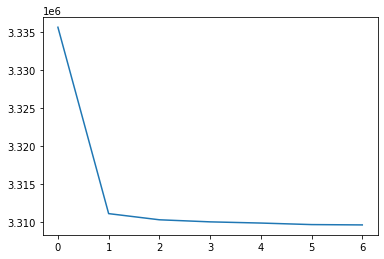

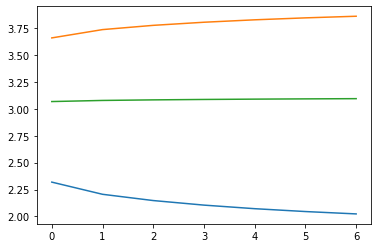

In [26]:
plt.plot(Loss)
plt.show()

plt.plot(alphas)
plt.plot(betas)
plt.plot(gammas)
plt.show()

In [27]:
print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())

Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268


In [28]:
grid.p0.min().item(), grid.p0.max().item(), grid.div.min().item(), grid.div.max().item()

(1.1943700883421116e-05, 0.010415895842015743, 96.0071029663086, 83726.140625)

Artana
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  6.920112809893908e-06 0.00012385107402224094 3.053326145163737e-05 2.5180102966260165e-05
Los valores que toma div:  8074.21337890625 144506.3125 57116.28125 38520.9765625
Elapsed time to get the results:      131.55128121376038
Number of iterations (K, n_it):                91 100
Beneixama
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  2.266015508212149e-05 0.010102298110723495 0.002190127968788147 0.002946146996691823
Los valores que toma div:  98.98738098144531 44130.32421875 6902.27197265625 11957.5078125
Elapsed time to get the results:      27.05631113052368
Number of iterations (K, n_it):                17 100
Beniarda
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  1.765387878549518e-06 0.00023443778627552092 3.7

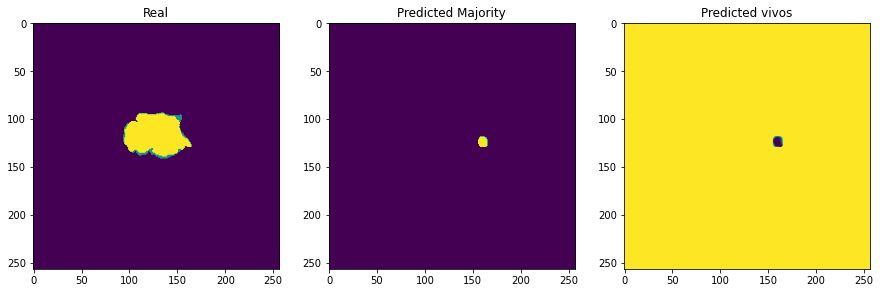

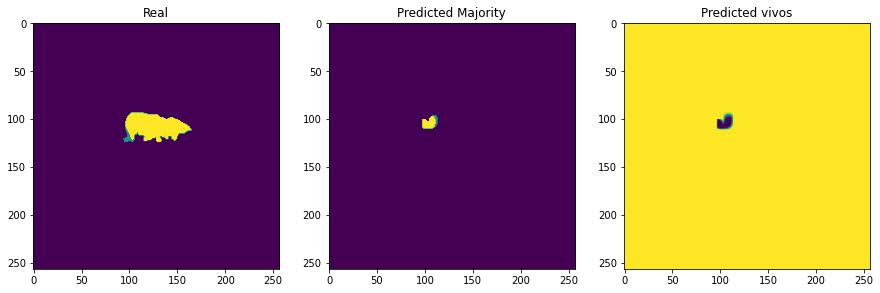

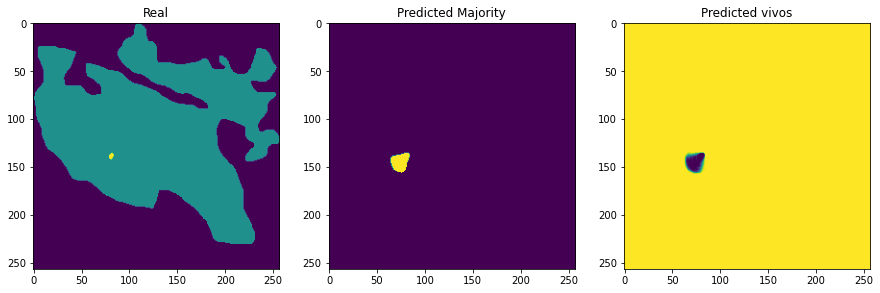

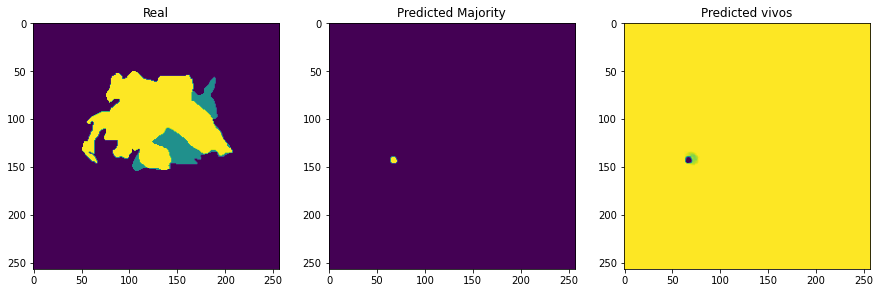

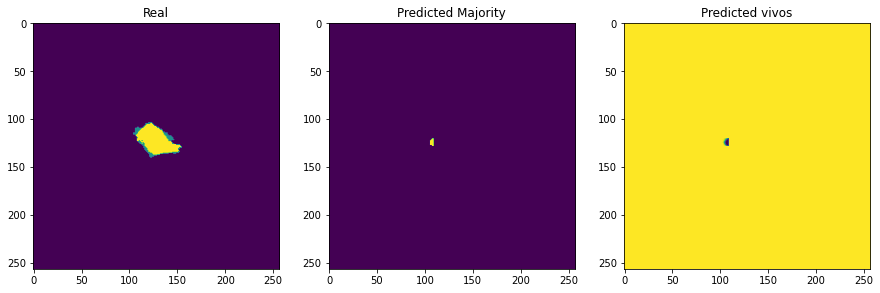

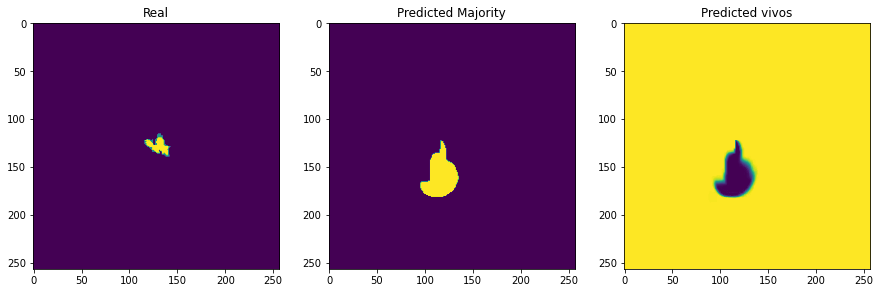

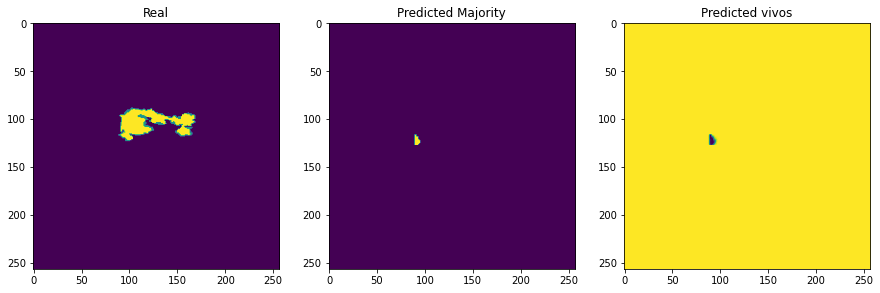

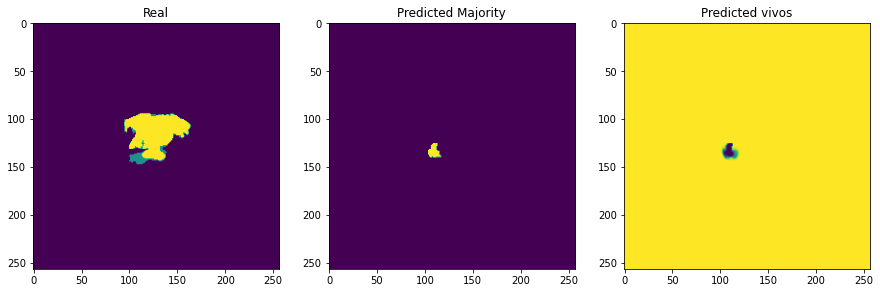

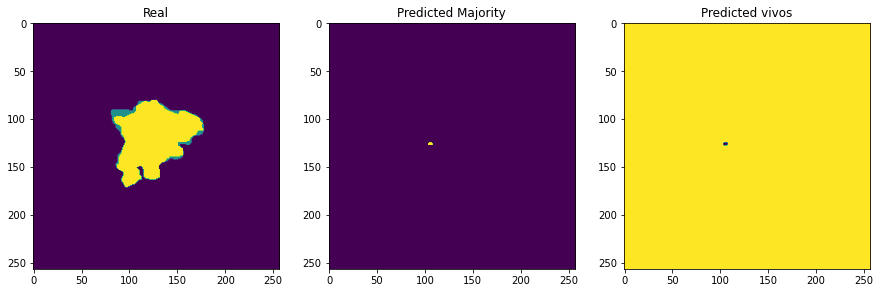

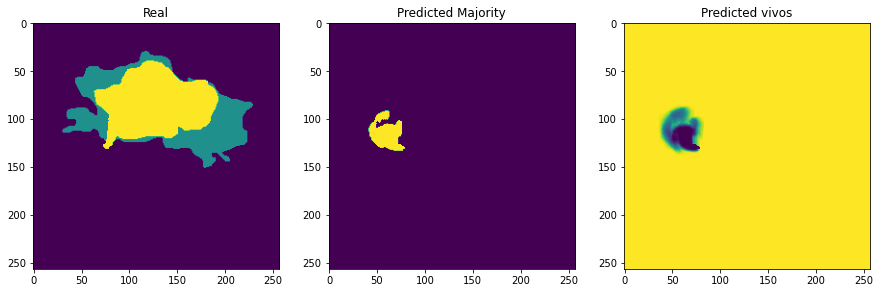

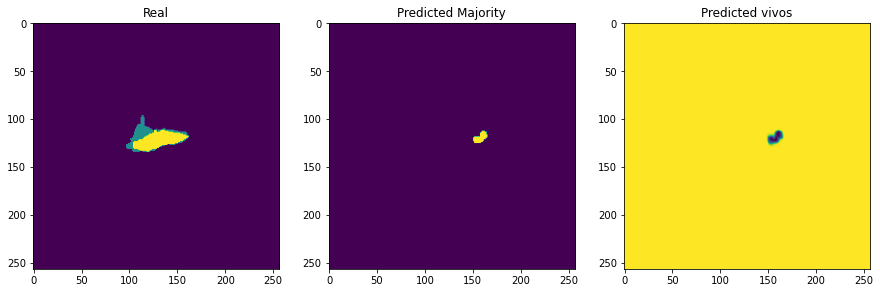

In [30]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.2, 0.21, 0.3], inc=2)
    grid.submatrix()
    grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Los valores que toma p0: ', grid.p0.min().item(), grid.p0.max().item(), grid.p0.mean().item(), grid.p0.std().item())
    print('Los valores que toma div: ', grid.div.min().item(), grid.div.max().item(), grid.div.mean().item(), grid.div.std().item())
    grid.enlargement_process_AI()
    grid.montecarlo(n_it=100)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    fig
    
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

Artana
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  6.920112809893908e-06 0.00012385107402224094 3.053326145163737e-05 2.5180102966260165e-05
Los valores que toma div:  8074.21337890625 144506.3125 57116.28125 38520.9765625
Elapsed time to get the results:      94.0217878818512
Number of iterations (K, n_it):                91 100
Beneixama
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  2.266015508212149e-05 0.010102298110723495 0.002190127968788147 0.002946146996691823
Los valores que toma div:  98.98738098144531 44130.32421875 6902.27197265625 11957.5078125
Elapsed time to get the results:      18.141932010650635
Number of iterations (K, n_it):                17 100
Beniarda
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  1.765387878549518e-06 0.00023443778627552092 3.72

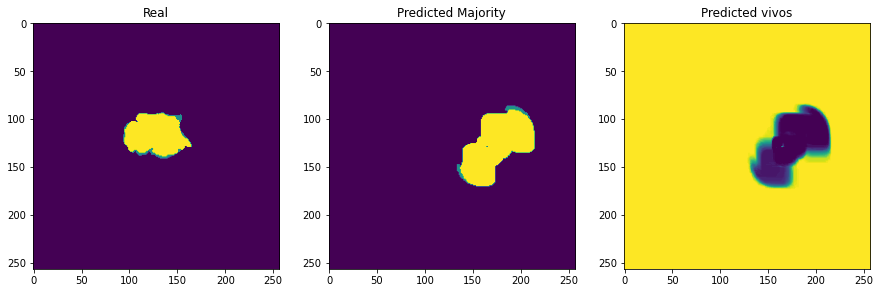

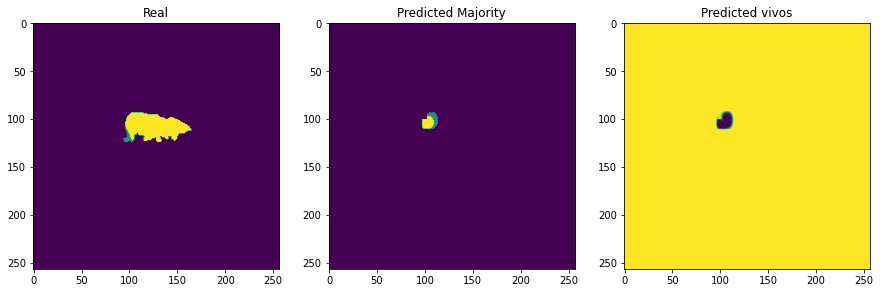

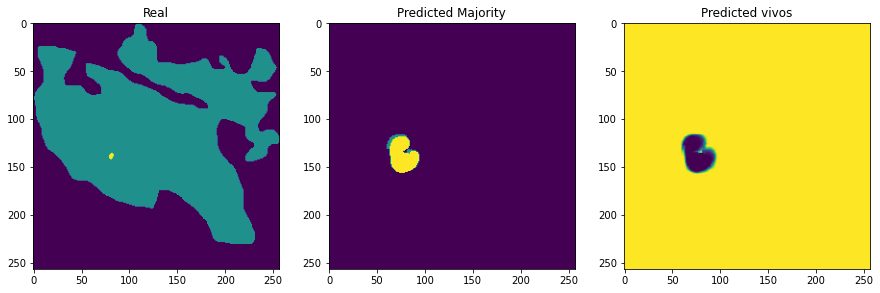

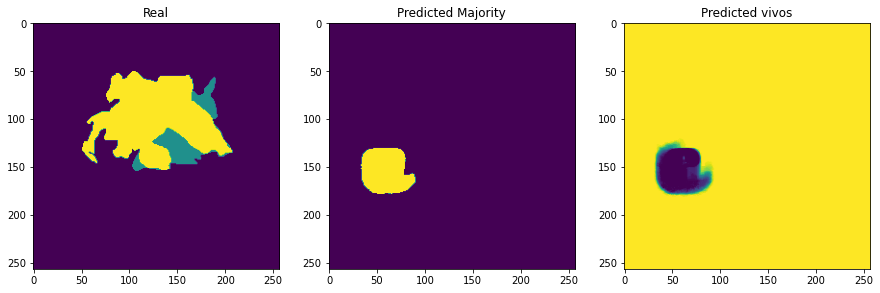

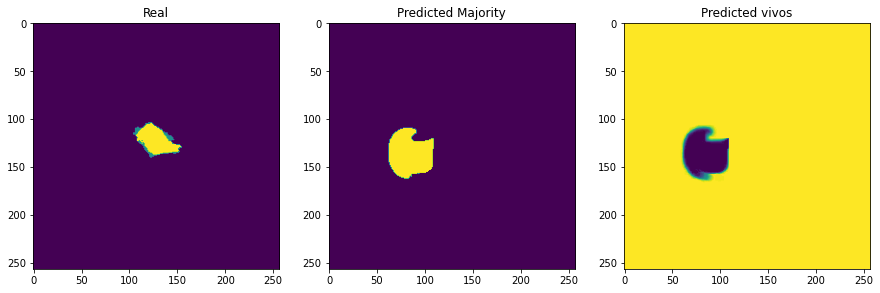

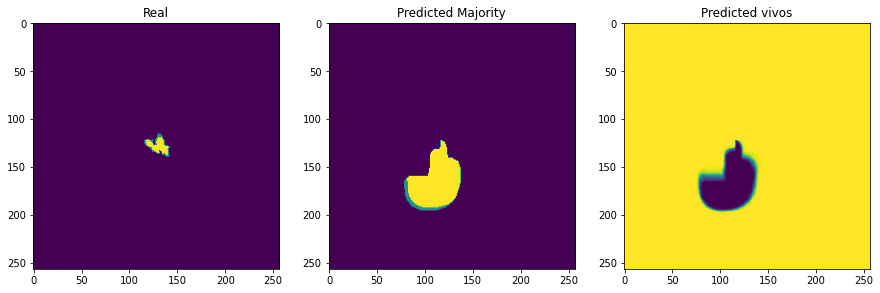

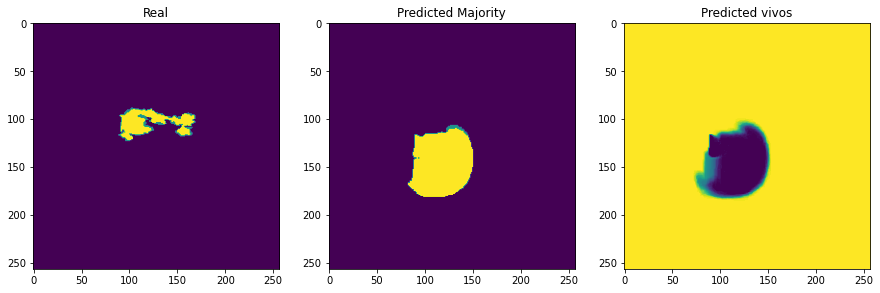

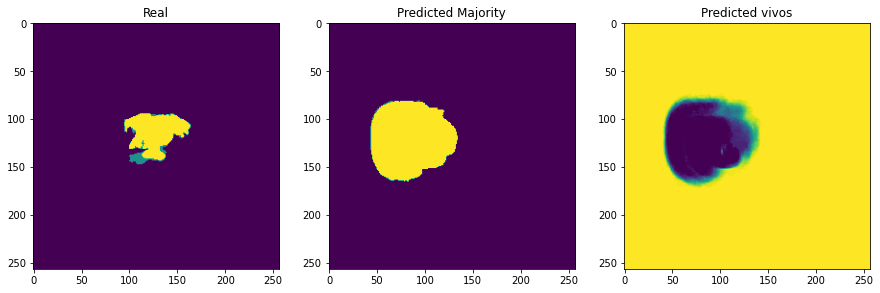

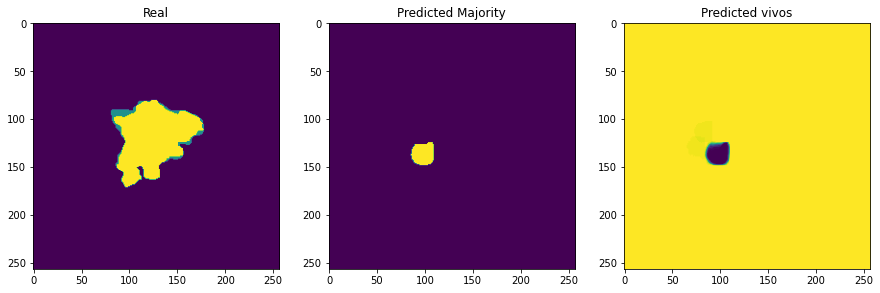

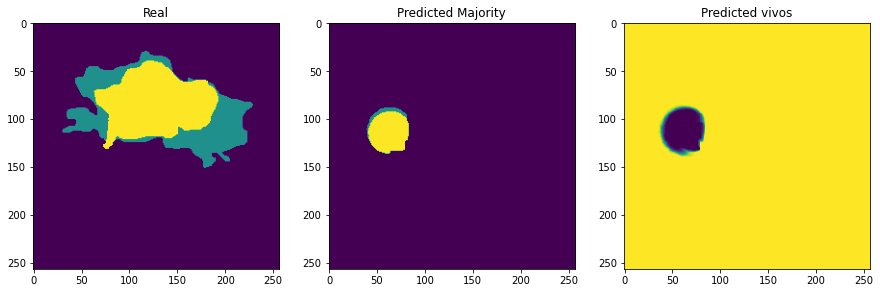

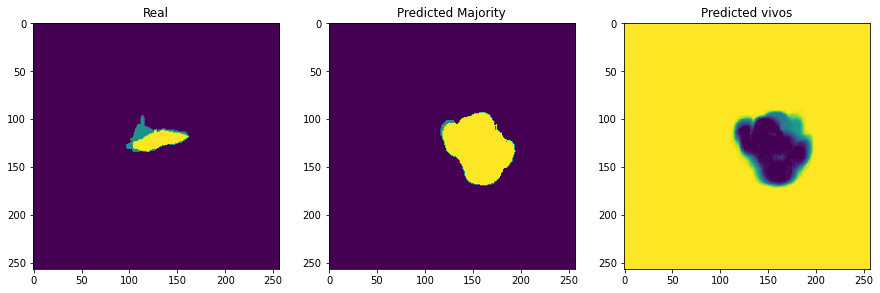

In [31]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9], inc=4)
    grid.submatrix()
    grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Los valores que toma p0: ', grid.p0.min().item(), grid.p0.max().item(), grid.p0.mean().item(), grid.p0.std().item())
    print('Los valores que toma div: ', grid.div.min().item(), grid.div.max().item(), grid.div.mean().item(), grid.div.std().item())
    grid.enlargement_process_AI()
    grid.montecarlo(n_it=50)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    fig
    
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)

Artana
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  6.920112809893908e-06 0.00012385107402224094 3.053326145163737e-05 2.5180102966260165e-05
Los valores que toma div:  8074.21337890625 144506.3125 57116.28125 38520.9765625
Elapsed time to get the results:      259.6898865699768
Number of iterations (K, n_it):                91 100
Beneixama
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  2.266015508212149e-05 0.010102298110723495 0.002190127968788147 0.002946146996691823
Los valores que toma div:  98.98738098144531 44130.32421875 6902.27197265625 11957.5078125
Elapsed time to get the results:      110.45631241798401
Number of iterations (K, n_it):                17 100
Beniarda
Los parámetros (alpha, beta, gamma):  2.023098945617676 3.861008405685425 3.0947353839874268
Los valores que toma p0:  1.765387878549518e-06 0.00023443778627552092 3.7

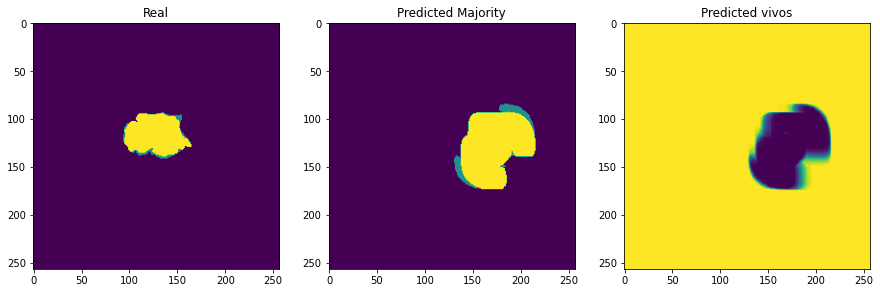

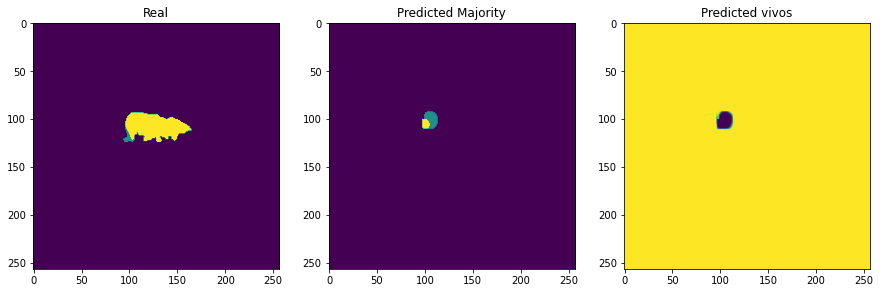

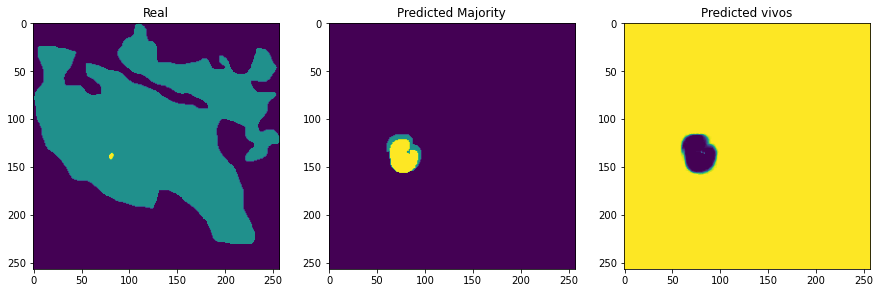

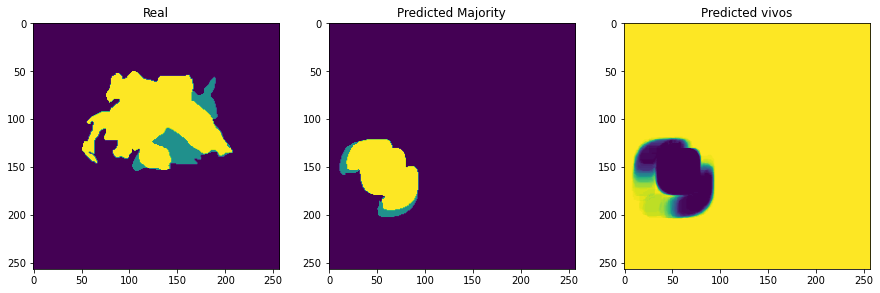

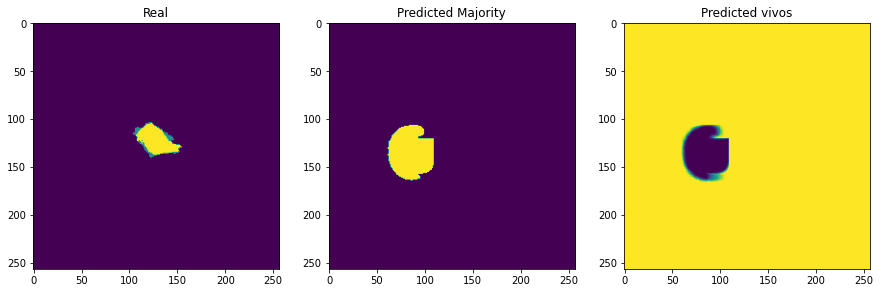

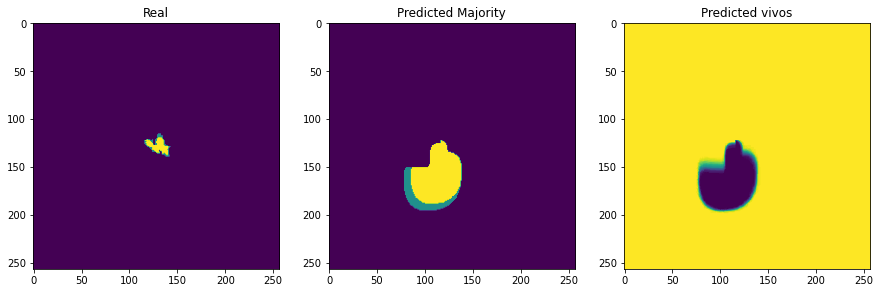

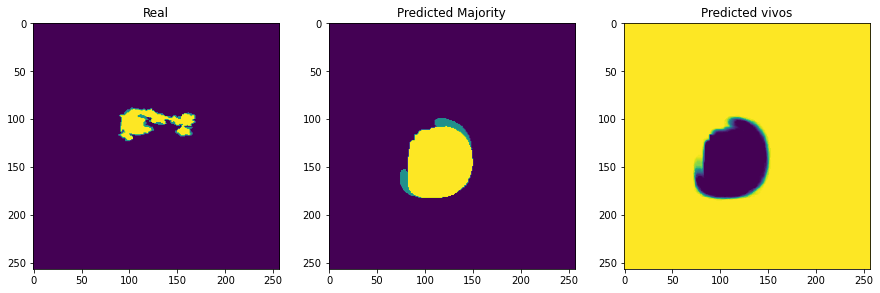

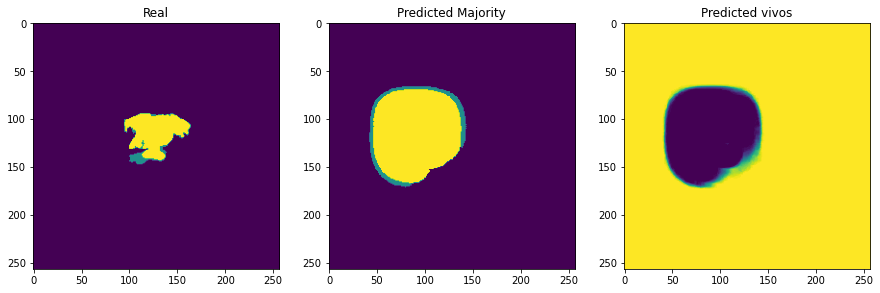

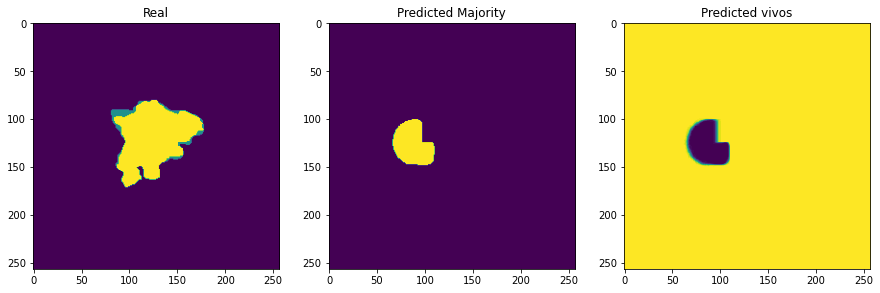

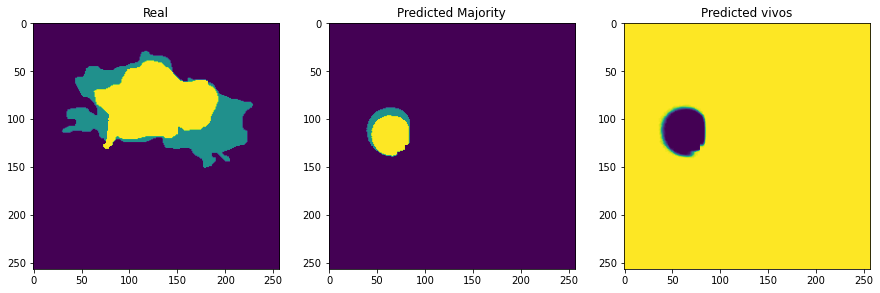

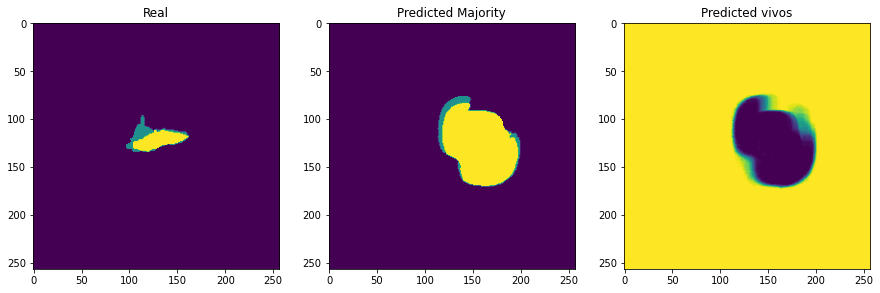

In [32]:
t_ini = time.time()

for name in dict_data_final.keys():
    print(name)
    t0 = time.time()

    x, y = dict_data_final[name]
    grid = Grid(x=x, y=y)
    grid.initialize(part=[0.1, 0.5, 0.9], inc=8)
    grid.submatrix()
    grid.p0, grid.div = fun_p0_c(grid.Temp, grid.Hum, alpha=alpha, beta=beta, gamma=gamma)
    print('Los parámetros (alpha, beta, gamma): ', alpha.item(), beta.item(), gamma.item())
    print('Los valores que toma p0: ', grid.p0.min().item(), grid.p0.max().item(), grid.p0.mean().item(), grid.p0.std().item())
    print('Los valores que toma div: ', grid.div.min().item(), grid.div.max().item(), grid.div.mean().item(), grid.div.std().item())
    grid.enlargement_process_AI()
    grid.montecarlo(n_it=50)

    tf = time.time()

    print('Elapsed time to get the results:     ',tf-t0)
    print('Number of iterations (K, n_it):               ',grid.K, 100)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(y[:, :, -1])
    ax[0].set_title('Real')
    ax[1].imshow(grid.X[:, :, -1])
    ax[1].set_title('Predicted Majority')
    ax[2].imshow(grid.X0[:, :, -1])
    ax[2].set_title('Predicted vivos')

    fig
    
    #plt.imshow(y[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X[:, :, -1])
    #plt.show()
    #plt.imshow(grid.X0[:, :, -1])
    #plt.show()

t_fin = time.time()

print('Elapsed time to get ALL the results:     ',t_fin-t_ini)